# **Análisis de canciones: Predicción del género musical**

# Proyecto de Machine Learning

## PARTE I: EDA & FEATURE ENGINEERING

### by Marta Buesa

#### Febrero 2022 

![MartaBuesaProyectoML](portada_ML.png)

Detectar el género de una canción puede ser aparentemente fácil si conocemos el autor, dado que en general suelen moverse dentro de un mismo género musical.

Sin embargo, si se quiere clasificar una canción sin conocer el autor, ya empieza a ser más dificil. Quizás para quienes tienen conocimientos y cultura musical o a quienes les gusta mucho la música pudieran tener una idea del género al que pertenezca una canción al escucharla.

Para ello, se ha tomado una BBDD con una muestra amplia de 50000 canciones pertenecientes a 10 géneros diferentes, y así poder analizar según sus características la predicción del genero musical en el que se clasificarían.

CSV fuente:
https://www.kaggle.com/vicsuperman/prediction-of-music-genre 

## Importo librerias

In [474]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Importo csv barajado

In [475]:
music_df = pd.read_csv("csvs/music_genre_barajado.csv")
music_df.head(10)

Unnamed: 0       artist_name                          track_name  \
0           0       Lupe Fiasco               XO (feat. Troi Irons)   
1           1        Grandtheft                             Easy Go   
2           2  Hollywood Undead                       Comin’ In Hot   
3           3           Santana        Nothing At All (feat. Musiq)   
4           4      Pink Martini                          Hey Eugene   
5           5         DJ Shadow                         Organ Donor   
6           6          Lil Pump  Youngest Flexer (feat. Gucci Mane)   
7           7        Atmosphere                 Modern Man's Hustle   
8           8  Brantley Gilbert                        Just As I Am   
9           9    The Black Keys                      You're the One   

   popularity  acousticness  danceability  duration_ms  energy  \
0        51.0        0.0224         0.662     271871.0   0.922   
1        49.0        0.1070         0.681     190912.0   0.922   
2        61.0        0.0146         0.708         -1.0   0.749   
3        40.0        0.1030         0.532     268827.0   0.643   
4        34.0        0.4420         0.723         -1.0   0.573   
5        41.0        0.8370         0.610     117240.0   0.571   
6        55.0        0.2460         0.854     199111.0   0.648   
7        46.0        0.1540         0.859     225227.0   0.609   
8        44.0        0.8690         0.384     245946.0   0.380   
9        44.0        0.8220         0.594     208227.0   0.462   

   instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0           0.00000   A    0.4990    -4.862  Minor       0.2300  128.137   
1           0.00167   F    0.0938    -3.592  Major       0.0779  156.071   
2           0.00000   D    0.0913    -5.640  Major       0.0897   96.016   
3           0.00000   G    0.1230    -7.039  Minor       0.0638        ?   
4           0.00010   D    0.1020    -7.303  Major       0.0459   95.802   
5           0.74300  C#    0.1500    -7.136  Minor       0.0315  106.185   
6           0.00000   A    0.1250    -5.251  Major       0.0808  134.916   
7           0.00000   B    0.3480    -3.633  Major       0.2860   85.976   
8           0.00000  G#    0.3220    -9.560  Major       0.0460  134.885   
9           0.00186   G    0.1230   -10.218  Major       0.0403        ?   

   valence  music_genre  
0    0.174          Rap  
1    0.566   Electronic  
2    0.382          Rap  
3    0.208        Blues  
4    0.509         Jazz  
5    0.909   Electronic  
6    0.718      Hip-Hop  
7    0.649      Hip-Hop  
8    0.333      Country  
9    0.529  Alternative

In [476]:
music_df.drop(columns=['Unnamed: 0'], inplace=True)

Tenemos 15 variables descriptivas de una canción las canciones que son:

- **artist_name**: Nombre del artista de la canción.
- **popularity**: una puntuación arbitraria asignada a la canción en el rango de 0 a 100, siendo 100 la más popular y 0 la menos.
- **acousticness**: este valor describe qué tan acústica es una canción. Una puntuación de 1,0 significa que lo más probable es que la canción sea acústica.
- **danceability**: la bailabilidad describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales. Un valor de 0,0 es menos bailable y 1,0 es más bailable

- **duration_ms** : Es la duración en milisegundos de la canción.
- **energy**: Representa la energía de la canción. El rango de este campo está entre [0-1], siendo 1 la canción con la energía más alta y 0 con la más baja.
- **instrumentalness**: este valor representa la cantidad de voces en la canción. Cuanto más cerca está de 1.0, más instrumental es la canción.

- **key**: La clave de una pieza es el grupo de tonos, o escala, que forma la base de una composición musical.
- **liveness**: este valor describe la probabilidad de que la canción se haya grabado con una audiencia en vivo. [0-1]
- **loudness**: Columna que representa el volumen de la canción.
- **mode**: escalas mayores y menores en las que se basa la canción.

- **speechiness**: Speechiness detecta la presencia de palabras habladas en una pista.
- **tempo**: Velocidad a la que se reproduce la canción.
- **valence**: Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas.
- **music_genre**: la categoría real a la que pertenece la canción. Esta es nuestra variable objetivo.

### Antes de hacer Split quiero observar mi feature 'artist_name' como es

In [477]:
music_df[music_df['artist_name'].isin(['Timbaland'])]

artist_name                               track_name  popularity  \
20564   Timbaland                            Give It To Me        54.0   
36525   Timbaland  Carry Out (Featuring Justin Timberlake)        63.0   
43222   Timbaland          Say Something (Featuring Drake)        55.0   
48426   Timbaland                                Apologize        63.0   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
20564        0.1700         0.973     234027.0   0.723          0.000282  G#   
36525        0.1170         0.478     232467.0   0.569          0.066900  A#   
43222        0.0912         0.559     240920.0   0.741          0.000000   B   
48426        0.0399         0.654         -1.0   0.610          0.000000  G#   

       liveness  loudness   mode  speechiness               tempo  valence  \
20564    0.0863    -4.017  Major       0.0569             110.625    0.751   
36525    0.2480    -6.764  Minor       0.1480                   ?    0.259   
43222    0.7350    -4.491  Major       0.0889              79.887    0.718   
48426    0.1010    -6.051  Major       0.0285  118.03200000000001    0.118   

      music_genre  
20564         Rap  
36525         Rap  
43222     Hip-Hop  
48426         Rap

In [478]:
music_df[music_df['artist_name'].isin(['Oasis'])]

artist_name                             track_name  popularity  \
25425       Oasis              Live Forever - Remastered        55.0   
47275       Oasis       Champagne Supernova - Remastered        64.0   
49909       Oasis  Don't Look Back In Anger - Remastered        65.0   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
25425      0.000024         0.104     276662.0   0.794          0.000015   A   
47275      0.470000         0.286         -1.0   0.796          0.063000   D   
49909      0.059600         0.333     289559.0   0.922          0.000002   C   

       liveness  loudness   mode  speechiness               tempo  valence  \
25425     0.355    -4.353  Minor       0.0426   83.97200000000001    0.179   
47275     0.364    -4.625  Major       0.0388  150.27200000000002    0.120   
49909     0.126    -4.087  Major       0.0592  162.97799999999998    0.335   

      music_genre  
25425        Rock  
47275        Rock  
49909        Rock

In [479]:
music_df[music_df['music_genre'].isin(['Rock'])][['artist_name', 'music_genre']].value_counts()

artist_name          music_genre
empty_field          Rock           242
The Beatles          Rock            81
Queen                Rock            45
Panic! At The Disco  Rock            43
Led Zeppelin         Rock            43
                                   ... 
Lee Roy Parnell      Rock             1
Leo Sayer            Rock             1
Less Than Jake       Rock             1
Level 42             Rock             1
watt                 Rock             1
Length: 1452, dtype: int64

In [480]:
music_df.music_genre.unique().tolist()

['Rap',
 'Electronic',
 'Blues',
 'Jazz',
 'Hip-Hop',
 'Country',
 'Alternative',
 'Rock',
 'Classical',
 'Anime']

In [481]:
df = pd.DataFrame()
for i in music_df.music_genre.unique().tolist():
    print('\nGenero:',i)
    artist_genre = music_df[(music_df.music_genre == i)]['artist_name'].value_counts()
    gen = pd.DataFrame(artist_genre)
    df[i] = gen

df  


Genero: Rap

Genero: Electronic

Genero: Blues

Genero: Jazz

Genero: Hip-Hop

Genero: Country

Genero: Alternative

Genero: Rock

Genero: Classical

Genero: Anime


Rap  Electronic  Blues   Jazz  Hip-Hop  Country  Alternative  \
empty_field     263       223.0  255.0  230.0    245.0    221.0        272.0   
Drake            81         NaN    NaN    NaN     91.0      NaN          NaN   
Kanye West       63         NaN    NaN    NaN      NaN      NaN          NaN   
Eminem           56         NaN    NaN    NaN     91.0      NaN          NaN   
Future           53         NaN    NaN    NaN     71.0      NaN          NaN   
...             ...         ...    ...    ...      ...      ...          ...   
Boyz N Da Hood    1         NaN    NaN    NaN      1.0      NaN          NaN   
Jean Michael      1         NaN    NaN    NaN      NaN      NaN          NaN   
Crucifix          1         NaN    NaN    NaN      NaN      2.0          NaN   
Joey Purp         1         NaN    NaN    NaN      NaN      NaN          NaN   
G-Unit            1         NaN    NaN    NaN      4.0      NaN          NaN   

                 Rock  Classical  Anime  
empty_field     242.0      266.0  272.0  
Drake             NaN        NaN    NaN  
Kanye West        NaN        NaN    NaN  
Eminem            NaN        NaN    NaN  
Future            NaN        NaN    NaN  
...               ...        ...    ...  
Boyz N Da Hood    NaN        NaN    NaN  
Jean Michael      NaN        NaN    NaN  
Crucifix          NaN        NaN    NaN  
Joey Purp         NaN        NaN    NaN  
G-Unit            NaN        NaN    NaN  

[792 rows x 10 columns]

#### **Veo que hay registros de un autor con varias canciones clasificadas en diferentes géneros musicales**

In [482]:
music_df.drop(columns=['track_name'], inplace=True) 

## 5. TRAIN / TEST SPLIT

### Divido el dataset por Features y Target

In [483]:
X = music_df.drop('music_genre', axis=1)
y = music_df['music_genre']

In [484]:
# Veo como queda mi tabla de Features
X

artist_name  popularity  acousticness  danceability  \
0                  Lupe Fiasco        51.0      0.022400         0.662   
1                   Grandtheft        49.0      0.107000         0.681   
2             Hollywood Undead        61.0      0.014600         0.708   
3                      Santana        40.0      0.103000         0.532   
4                 Pink Martini        34.0      0.442000         0.723   
...                        ...         ...           ...           ...   
49995  Wolfgang Amadeus Mozart         0.0      0.974000         0.528   
49996    Johann Sebastian Bach         0.0      0.994000         0.514   
49997                  Crazy P        47.0      0.000535         0.714   
49998                Ai Otsuka        37.0      0.683000         0.502   
49999               Nogizaka46        26.0      0.565000         0.591   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0         271871.0   0.922          0.000000   A    0.4990    -4.862  Minor   
1         190912.0   0.922          0.001670   F    0.0938    -3.592  Major   
2             -1.0   0.749          0.000000   D    0.0913    -5.640  Major   
3         268827.0   0.643          0.000000   G    0.1230    -7.039  Minor   
4             -1.0   0.573          0.000100   D    0.1020    -7.303  Major   
...            ...     ...               ...  ..       ...       ...    ...   
49995     214096.0   0.188          0.959000   A    0.1430   -16.671  Major   
49996      31787.0   0.144          0.003390  G#    0.1140   -17.243  Major   
49997     246399.0   0.816          0.339000  A#    0.0685    -6.818  Minor   
49998     272767.0   0.453          0.000035  D#    0.1040    -8.033  Major   
49999     320093.0   0.814          0.000000  C#    0.0694    -3.594  Major   

       speechiness    tempo  valence  
0           0.2300  128.137    0.174  
1           0.0779  156.071    0.566  
2           0.0897   96.016    0.382  
3           0.0638        ?    0.208  
4           0.0459   95.802    0.509  
...            ...      ...      ...  
49995       0.0557  126.705    0.868  
49996       0.0486        ?    0.253  
49997       0.0330  114.991    0.335  
49998       0.0315        ?    0.332  
49999       0.0332  139.991    0.595  

[50000 rows x 14 columns]

In [485]:
# Veo como queda mi tabla de Target
y

0               Rap
1        Electronic
2               Rap
3             Blues
4              Jazz
            ...    
49995     Classical
49996     Classical
49997          Jazz
49998         Anime
49999         Anime
Name: music_genre, Length: 50000, dtype: object

In [486]:
# Divido en TRAIN & TEST
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [487]:
# Veo la forma de TRAIN y de test
print('TRAIN:\nX_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('\nTEST:\nX_test: ', X_test.shape)
print('y_test: ', y_test.shape)

TRAIN:
X_train:  (40000, 14)
y_train:  (40000,)

TEST:
X_test:  (10000, 14)
y_test:  (10000,)


### Observo como ha quedado de balanceado mi TARGET

In [488]:
# Miro como han quedado de balanceados los generos en mi TARGET de TRAIN
from collections import Counter

counter_train = Counter(y_train)

for gen, valor in counter_train.items():
    num = float(valor/(y_train.shape[0])*100)
    print(gen,':', round(num, 2), '%')

Electronic : 9.98 %
Blues : 9.98 %
Classical : 10.08 %
Country : 10.04 %
Alternative : 9.99 %
Anime : 10.03 %
Rap : 9.94 %
Jazz : 10.04 %
Rock : 9.97 %
Hip-Hop : 9.96 %


#### Bien!!!!! obtengo una representación balanceada de los 10 géneros musicales

## 6. Exploratory Data Analysis

### Hago un reporte de X_train

In [489]:
def data_report(df):
    '''
    Función que me devuelve un tabla reporte con aspectos que considero claves, el tipo de dato, los missings, valores unicos y su cardinalidad
    
    '''
    # Saco los nombres de las variables
    cols = pd.DataFrame(df.columns.values, columns=['COL_N'])
    
    # Saco los tipos de datos
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])
    
    # Saco los missings
    percent_missing = round(df.isnull().sum()*100/len(df),2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns = ["MISSINGS (%)"])

    # Saco los valores unicos
    unicos = pd.DataFrame(df.nunique().values, columns = ["UNIQUE_VALUES"])

    # Saco la cardinalidad
    percent_cardin = round(unicos["UNIQUE_VALUES"]*100/len(df),2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns = ["CARDIN (%)"])
      
    # tabla concatenada
    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado


data_report(X_train)

DATA_TYPE  MISSINGS (%)  UNIQUE_VALUES  CARDIN (%)
COL_N                                                              
artist_name         object           0.0           6307       15.77
popularity         float64           0.0             99        0.25
acousticness       float64           0.0           4039       10.10
danceability       float64           0.0           1062        2.66
duration_ms        float64           0.0          22498       56.24
energy             float64           0.0           1992        4.98
instrumentalness   float64           0.0           4991       12.48
key                 object           0.0             12        0.03
liveness           float64           0.0           1611        4.03
loudness           float64           0.0          15730       39.33
mode                object           0.0              2        0.00
speechiness        float64           0.0           1319        3.30
tempo               object           0.0          25050       62.62
valence            float64           0.0           1594        3.98

### Así también observo mi tabla X_TRAIN

In [490]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 39087 to 15795
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       40000 non-null  object 
 1   popularity        40000 non-null  float64
 2   acousticness      40000 non-null  float64
 3   danceability      40000 non-null  float64
 4   duration_ms       40000 non-null  float64
 5   energy            40000 non-null  float64
 6   instrumentalness  40000 non-null  float64
 7   key               40000 non-null  object 
 8   liveness          40000 non-null  float64
 9   loudness          40000 non-null  float64
 10  mode              40000 non-null  object 
 11  speechiness       40000 non-null  float64
 12  tempo             40000 non-null  object 
 13  valence           40000 non-null  float64
dtypes: float64(10), object(4)
memory usage: 4.6+ MB


#### Bien!!! no hay valores nulos

In [491]:
# También un resumen descriptivo de como son los datos en cada columna
X_train.describe().T

count           mean            std        min  \
popularity        40000.0      44.198775      15.528586   0.000000   
acousticness      40000.0       0.307490       0.342177   0.000000   
danceability      40000.0       0.557862       0.178730   0.060600   
duration_ms       40000.0  221151.200450  129689.682578  -1.000000   
energy            40000.0       0.599679       0.265530   0.000795   
instrumentalness  40000.0       0.182017       0.325498   0.000000   
liveness          40000.0       0.193265       0.160514   0.009670   
loudness          40000.0      -9.149487       6.199196 -46.122000   
speechiness       40000.0       0.093489       0.101157   0.022300   
valence           40000.0       0.455963       0.246956   0.000000   

                           25%            50%          75%          max  
popularity            34.00000      45.000000      55.0000       99.000  
acousticness           0.02000       0.144000       0.5570        0.996  
danceability           0.44100       0.568000       0.6870        0.986  
duration_ms       174601.50000  219019.000000  268190.2500  4830606.000  
energy                 0.43175       0.644000       0.8170        0.999  
instrumentalness       0.00000       0.000163       0.1570        0.994  
liveness               0.09680       0.126000       0.2430        1.000  
loudness             -10.86225      -7.260000      -5.1750        3.744  
speechiness            0.03620       0.048900       0.0983        0.942  
valence                0.25800       0.447000       0.6480        0.992

### Visualizo la distribución de las features

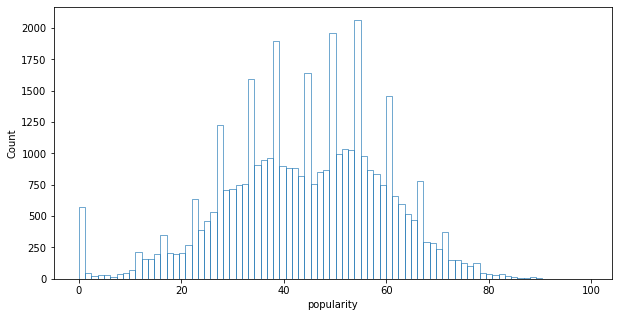

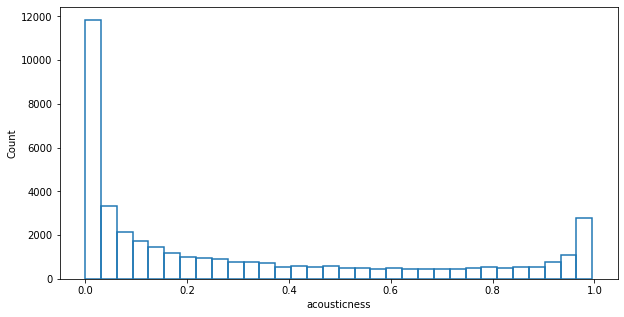

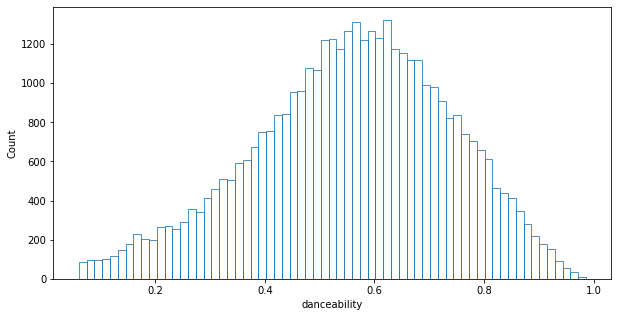

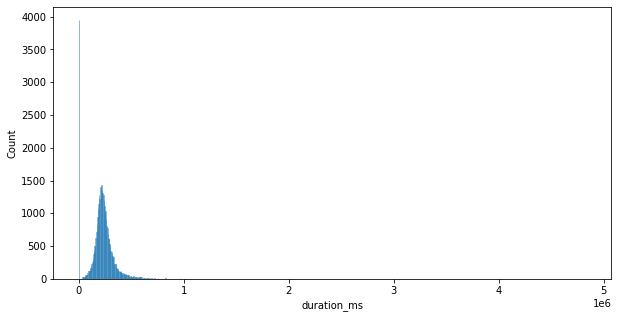

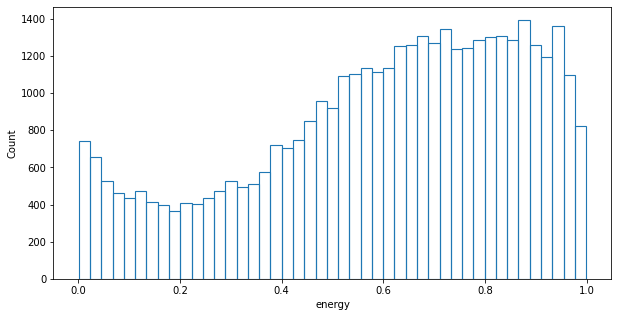

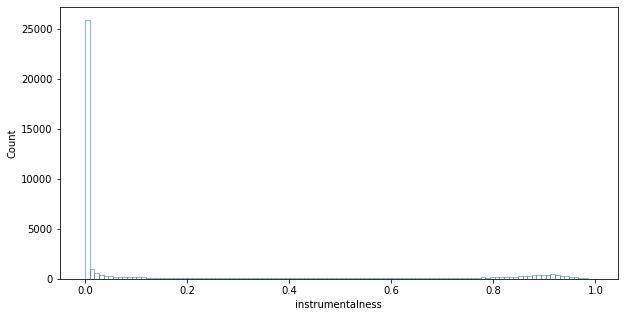

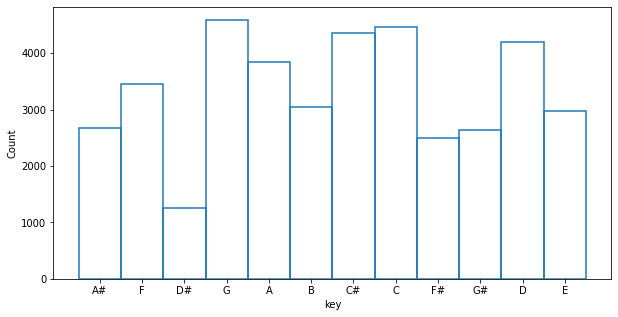

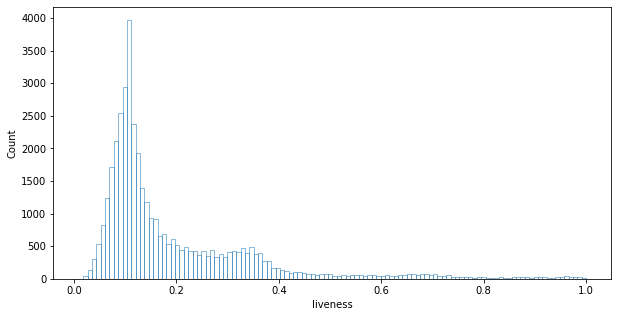

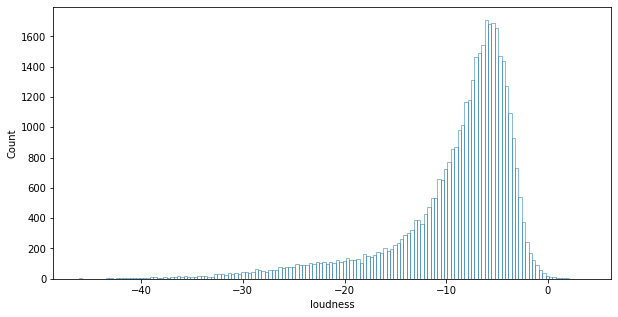

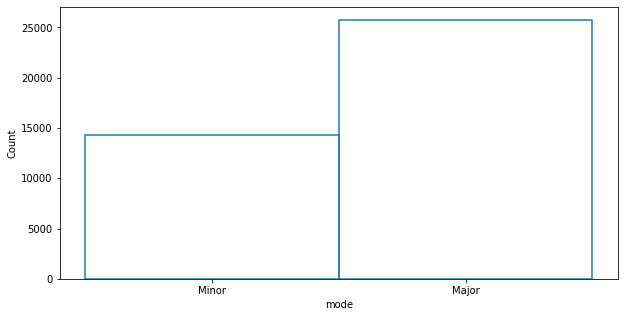

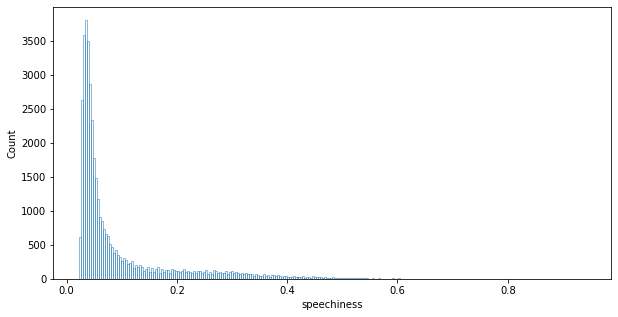

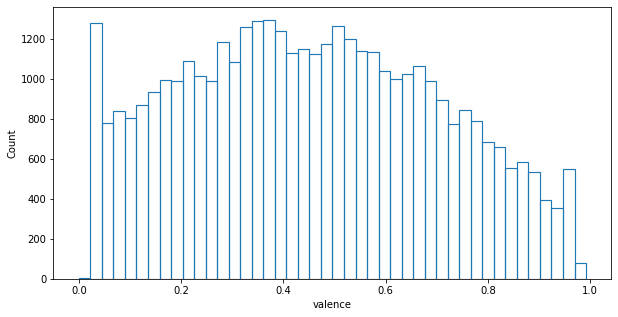

In [492]:
# Quiero ver graficamente sus distribuciones
for column in X_train.columns[1:-2]:
    plt.figure(figsize=[10,5])
    sns.histplot(X_train[column], fill=False)
for column in X_train.columns[13:14]:
    plt.figure(figsize=[10,5])
    sns.histplot(X_train[column], fill=False)

### Observo la variable 'artista' para decidir si me quedo o no con ella

In [493]:
# Cuantos artistas tiene el dataset
howmany = len(X_train.artist_name.unique())
howmany

6307

In [494]:
# Que artistas aparecen mas veces
X_train['artist_name'].value_counts().head(20)

empty_field                 1996
Nobuo Uematsu                337
Wolfgang Amadeus Mozart      330
Johann Sebastian Bach        259
Ludwig van Beethoven         249
Frédéric Chopin              192
Yuki Hayashi                 141
Drake                        141
Capcom Sound Team            131
Eminem                       113
Future                        99
Thievery Corporation          95
The Black Keys                87
Pyotr Ilyich Tchaikovsky      82
$uicideBoy$                   79
Kevin Gates                   79
Ryuichi Sakamoto              78
Logic                         78
Mac Miller                    78
ASIAN KUNG-FU GENERATION      75
Name: artist_name, dtype: int64

In [495]:
# Para ver todos los artistas contenidos en la BBDD
'''
for col in X_train[1:2]:
    print(col)
    print(sorted(X_train[col].unique()))
'''

'\nfor col in X_train[1:2]:\n    print(col)\n    print(sorted(X_train[col].unique()))\n'

Artistas en mi dataset


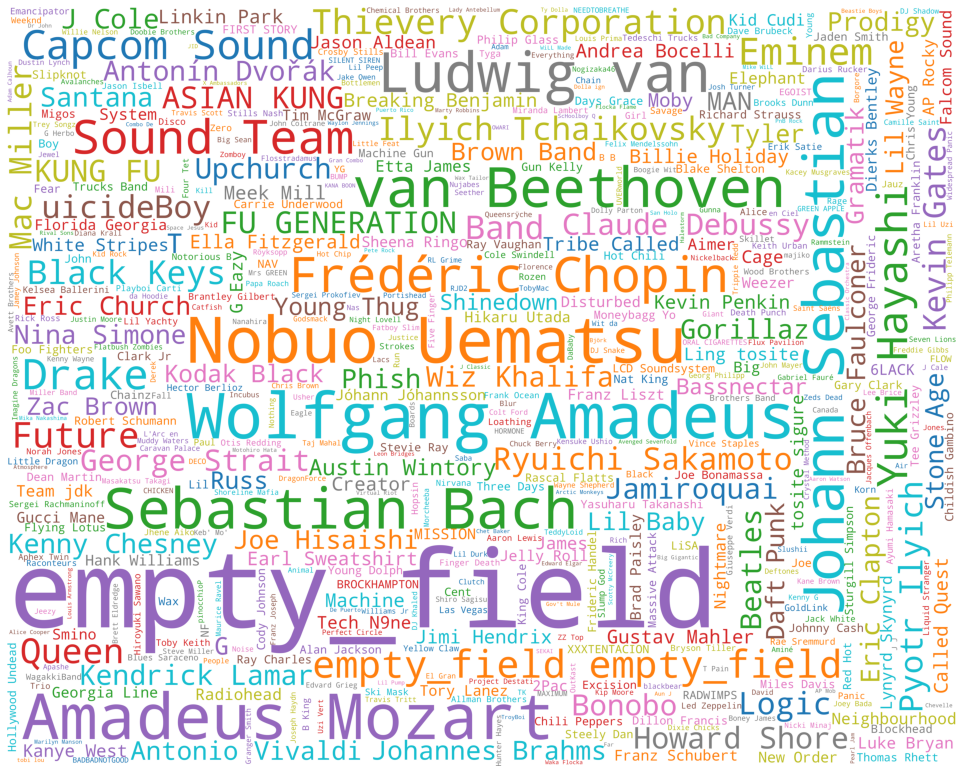

In [496]:
# Lo visualizo en nube de palabras
artistas = X_train['artist_name']

from wordcloud import WordCloud, STOPWORDS

# Veo visualmente que artista aparece mas veces
def wordcloud_draw(artistas, color = 'white'):
    words = ' '.join(artistas)
    wordcloud = WordCloud(background_color=color,
                      width=2500,
                      height=2000,
                      max_words=500, 
                      contour_width=0, 
                      contour_color='steelblue', 
                      colormap='tab10',
                      scale =3).generate(words)
    plt.figure(1, figsize = (17, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Artistas en mi dataset")
wordcloud_draw(artistas)


In [497]:
# Cuanto representan los 'empty_field'
print('Canciones sin artista representan un ', (X_train['artist_name'].value_counts().head(20)[0]/X_train['artist_name'].shape[0])*100, '%')

Canciones sin artista representan un  4.99 %


#### **Un 5% de las canciones de X_train no tienen asignado artista.** 

#### Asi que viendo que es posible tener canciones sin artista y que ciertos artistas de al BBDD también se les clasifica algunas de sus caciones en diferetes géneros, voy a aislar esta variable y **hacer mi modelo sin esta variable, para ver si el resto de variables pueden predecir el genero de una canción.**

In [498]:
X_train.drop(columns=['artist_name'], inplace=True) 

### Correlación entre columnas que interesan

In [499]:
X_train.corr()

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.288638      0.356987    -0.081733   
acousticness       -0.288638      1.000000     -0.348626     0.061613   
danceability        0.356987     -0.348626      1.000000    -0.157170   
duration_ms        -0.081733      0.061613     -0.157170     1.000000   
energy              0.213893     -0.793362      0.266085    -0.066069   
instrumentalness   -0.364538      0.390490     -0.303349     0.131267   
liveness           -0.040536     -0.112096     -0.049493     0.020936   
loudness            0.314365     -0.732228      0.393531    -0.102046   
speechiness         0.221541     -0.163944      0.278164    -0.082559   
valence             0.122223     -0.272113      0.436016    -0.132199   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.213893         -0.364538 -0.040536  0.314365     0.221541   
acousticness     -0.793362          0.390490 -0.112096 -0.732228    -0.163944   
danceability      0.266085         -0.303349 -0.049493  0.393531     0.278164   
duration_ms      -0.066069          0.131267  0.020936 -0.102046    -0.082559   
energy            1.000000         -0.391349  0.186709  0.839255     0.159607   
instrumentalness -0.391349          1.000000 -0.091534 -0.529829    -0.198967   
liveness          0.186709         -0.091534  1.000000  0.128312     0.114774   
loudness          0.839255         -0.529829  0.128312  1.000000     0.167283   
speechiness       0.159607         -0.198967  0.114774  0.167283     1.000000   
valence           0.397173         -0.271841  0.049126  0.341359     0.058167   

                   valence  
popularity        0.122223  
acousticness     -0.272113  
danceability      0.436016  
duration_ms      -0.132199  
energy            0.397173  
instrumentalness -0.271841  
liveness          0.049126  
loudness          0.341359  
speechiness       0.058167  
valence           1.000000

### Quiero ver la correlación con la variable Target

Quito para la visualizacion la columna 'tempo' debido a su gran volumen de datos diferentes

In [500]:
# Guardo mi columna tempo
mi_tempo = X_train['tempo']

In [501]:
# Quito para la visualizacion la columna 'tempo' debido a su gran volumen de datos diferentes
X_train_notempo = X_train.drop(columns=['tempo']) 

In [502]:
train_total = pd.concat([X_train_notempo, y_train], axis=1)
train_total

popularity  acousticness  danceability  duration_ms  energy  \
39087        37.0      0.001610         0.889     860761.0  0.4800   
30893        26.0      0.148000         0.481     345253.0  0.7760   
45278        21.0      0.960000         0.242     480013.0  0.1130   
16398        47.0      0.328000         0.798     219960.0  0.5380   
13653        39.0      0.031800         0.573         -1.0  0.7430   
...           ...           ...           ...          ...     ...   
11284        43.0      0.930000         0.369     689520.0  0.0461   
44732        44.0      0.016100         0.683     182000.0  0.6800   
38158        42.0      0.004630         0.302     395653.0  0.9190   
860          40.0      0.000191         0.246     443267.0  0.9400   
15795        37.0      0.023700         0.617     211200.0  0.7200   

       instrumentalness key  liveness  loudness   mode  speechiness  valence  \
39087          0.835000  A#    0.0514   -12.380  Minor       0.0747   0.0751   
30893          0.000000   F    0.7190    -8.404  Minor       0.0388   0.3720   
45278          0.844000  D#    0.1130   -21.232  Major       0.0349   0.1170   
16398          0.002060   G    0.1820   -11.412  Major       0.0363   0.6770   
13653          0.000000   G    0.1520    -6.047  Minor       0.0374   0.6060   
...                 ...  ..       ...       ...    ...          ...      ...   
11284          0.000307   D    0.0403   -23.665  Major       0.0512   0.0375   
44732          0.000000  A#    0.3190    -5.861  Minor       0.0376   0.5570   
38158          0.000007   D    0.1280    -4.719  Major       0.1830   0.4990   
860            0.130000  F#    0.1470    -5.598  Minor       0.1670   0.3470   
15795          0.470000  G#    0.0840    -7.331  Minor       0.0347   0.0725   

       music_genre  
39087   Electronic  
30893        Blues  
45278    Classical  
16398        Blues  
13653      Country  
...            ...  
11284    Classical  
44732   Electronic  
38158  Alternative  
860           Jazz  
15795   Electronic  

[40000 rows x 13 columns]

### Hago mapa de calor para ver la relación de las Features con el TARGET

interval columns not set, guessing: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']


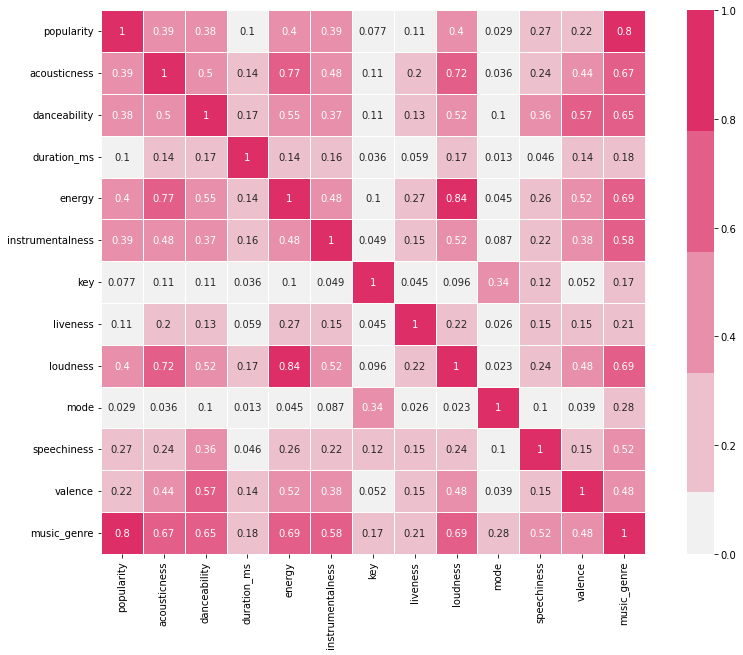

In [503]:
import phik
phik_matrix = train_total.phik_matrix()

plt.figure(figsize=(15,10))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(20, 0, s=85, n=9),
            square=True,
            annot=True,
            linewidths=.5);

In [504]:
phik_matrix

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000      0.385223      0.380677     0.104897   
acousticness        0.385223      1.000000      0.495310     0.139681   
danceability        0.380677      0.495310      1.000000     0.170081   
duration_ms         0.104897      0.139681      0.170081     1.000000   
energy              0.402999      0.770650      0.552053     0.143819   
instrumentalness    0.386054      0.482505      0.368964     0.156709   
key                 0.076901      0.108207      0.110797     0.035644   
liveness            0.110713      0.200751      0.128357     0.058539   
loudness            0.399781      0.716510      0.515522     0.168652   
mode                0.029280      0.036031      0.103762     0.012834   
speechiness         0.274919      0.235424      0.355617     0.045682   
valence             0.220919      0.436199      0.568639     0.142236   
music_genre         0.795374      0.671784      0.646727     0.184520   

                    energy  instrumentalness       key  liveness  loudness  \
popularity        0.402999          0.386054  0.076901  0.110713  0.399781   
acousticness      0.770650          0.482505  0.108207  0.200751  0.716510   
danceability      0.552053          0.368964  0.110797  0.128357  0.515522   
duration_ms       0.143819          0.156709  0.035644  0.058539  0.168652   
energy            1.000000          0.475086  0.100271  0.272879  0.840405   
instrumentalness  0.475086          1.000000  0.049442  0.151834  0.523391   
key               0.100271          0.049442  1.000000  0.044673  0.096342   
liveness          0.272879          0.151834  0.044673  1.000000  0.219848   
loudness          0.840405          0.523391  0.096342  0.219848  1.000000   
mode              0.045113          0.086674  0.341835  0.026342  0.022922   
speechiness       0.256194          0.221007  0.117624  0.146887  0.236767   
valence           0.516215          0.378956  0.051819  0.146590  0.476243   
music_genre       0.686726          0.580022  0.169932  0.214453  0.689158   

                      mode  speechiness   valence  music_genre  
popularity        0.029280     0.274919  0.220919     0.795374  
acousticness      0.036031     0.235424  0.436199     0.671784  
danceability      0.103762     0.355617  0.568639     0.646727  
duration_ms       0.012834     0.045682  0.142236     0.184520  
energy            0.045113     0.256194  0.516215     0.686726  
instrumentalness  0.086674     0.221007  0.378956     0.580022  
key               0.341835     0.117624  0.051819     0.169932  
liveness          0.026342     0.146887  0.146590     0.214453  
loudness          0.022922     0.236767  0.476243     0.689158  
mode              1.000000     0.104791  0.039475     0.282082  
speechiness       0.104791     1.000000  0.152841     0.515051  
valence           0.039475     0.152841  1.000000     0.484248  
music_genre       0.282082     0.515051  0.484248     1.000000

#### Observo que las **correlaciones más fuertes con el Target están en las variables Popularity, Energy, Loudness, Acousticness & Danceability**.


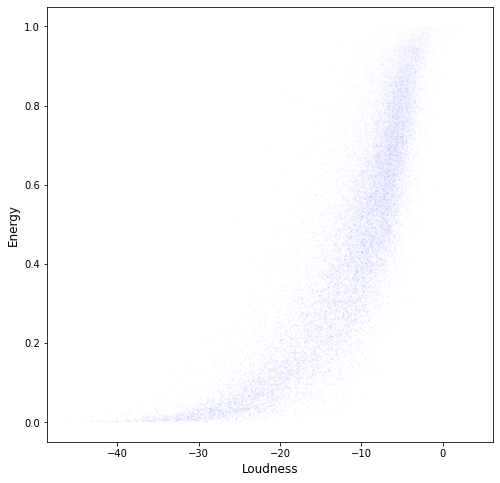

In [505]:
plt.figure(figsize=(8,8))

plt.scatter(x=train_total['loudness'], y=train_total['energy'], s=train_total['acousticness']*0.0005, color='blue')
plt.xlabel('Loudness',fontsize=12)
plt.ylabel('Energy',fontsize=12)
plt.show()

### Se aprecia colinealidad también entre 3 de esas variables del target

### Voy a ordenar por Feature Importance

In [506]:
corr = np.abs(phik_matrix.corr()['music_genre']).sort_values(ascending=False)
print(corr)

# Features con menos de 0.1 de correlación vs el target
bad_corr_feat = corr[corr < 0.1].index.values

# Filtramos las columnas buenas
order_fea = phik_matrix.drop(columns=bad_corr_feat, inplace=True)

music_genre         1.000000
popularity          0.871384
loudness            0.759618
acousticness        0.756840
energy              0.751586
danceability        0.720497
instrumentalness    0.661104
valence             0.493024
speechiness         0.417836
key                 0.398600
mode                0.262700
duration_ms         0.233148
liveness            0.149912
Name: music_genre, dtype: float64


In [507]:
train_total = pd.concat([train_total, mi_tempo], axis=1)

train_total.head()

popularity  acousticness  danceability  duration_ms  energy  \
39087        37.0       0.00161         0.889     860761.0   0.480   
30893        26.0       0.14800         0.481     345253.0   0.776   
45278        21.0       0.96000         0.242     480013.0   0.113   
16398        47.0       0.32800         0.798     219960.0   0.538   
13653        39.0       0.03180         0.573         -1.0   0.743   

       instrumentalness key  liveness  loudness   mode  speechiness  valence  \
39087           0.83500  A#    0.0514   -12.380  Minor       0.0747   0.0751   
30893           0.00000   F    0.7190    -8.404  Minor       0.0388   0.3720   
45278           0.84400  D#    0.1130   -21.232  Major       0.0349   0.1170   
16398           0.00206   G    0.1820   -11.412  Major       0.0363   0.6770   
13653           0.00000   G    0.1520    -6.047  Minor       0.0374   0.6060   

      music_genre               tempo  
39087  Electronic  100.00200000000001  
30893       Blues   98.37200000000001  
45278   Classical              80.195  
16398       Blues              81.018  
13653     Country  141.91899999999998

## 7. DATA CLEANING & FEATURE ENGINEERING:  SOBRE TRAIN

### 7.A. ZOOM y tratamiento columna 'duration_ms'

#### Observo la columna duración para ver que registros tienen muchos milisegundos

In [508]:
train_total['duration_ms'].value_counts()

-1.0         3949
 192000.0      26
 240000.0      26
 180000.0      20
 216000.0      18
             ... 
 152381.0       1
 288696.0       1
 42973.0        1
 185010.0       1
 443267.0       1
Name: duration_ms, Length: 22498, dtype: int64

#### Canciones con una duración no posible, donde aparece '-1' voy a sustituir por la mediana de la duración

In [509]:
train_total[(train_total['duration_ms'] < 0)]

popularity  acousticness  danceability  duration_ms  energy  \
13653        39.0       0.03180         0.573         -1.0   0.743   
7195         45.0       0.93700         0.501         -1.0   0.202   
10474        12.0       0.05660         0.530         -1.0   0.448   
1185         52.0       0.88300         0.447         -1.0   0.208   
46701        67.0       0.64800         0.711         -1.0   0.576   
...           ...           ...           ...          ...     ...   
44974        62.0       0.00148         0.433         -1.0   0.863   
23483        23.0       0.98300         0.378         -1.0   0.184   
43001        63.0       0.37500         0.730         -1.0   0.585   
30740        49.0       0.00312         0.728         -1.0   0.550   
3890         29.0       0.55000         0.612         -1.0   0.829   

       instrumentalness key  liveness  loudness   mode  speechiness  valence  \
13653           0.00000   G    0.1520    -6.047  Minor       0.0374    0.606   
7195            0.92100   G    0.1060   -17.766  Major       0.0567    0.393   
10474           0.91500   F    0.1640    -7.763  Major       0.0410    0.710   
1185            0.15300   D    0.1050   -18.663  Major       0.0337    0.511   
46701           0.00226   G    0.0528    -8.784  Minor       0.0305    0.645   
...                 ...  ..       ...       ...    ...          ...      ...   
44974           0.00107   E    0.3510    -4.452  Major       0.0296    0.540   
23483           0.83900   E    0.1150   -26.164  Minor       0.0410    0.156   
43001           0.01010   C    0.1470    -9.274  Major       0.0238    0.721   
30740           0.00000   D    0.0871    -6.049  Major       0.3790    0.305   
3890            0.41500   E    0.9130   -10.027  Minor       0.0356    0.662   

       music_genre               tempo  
13653      Country  141.91899999999998  
7195     Classical   89.14299999999999  
10474        Anime             133.262  
1185   Alternative             105.669  
46701         Rock             120.116  
...            ...                 ...  
44974         Rock   82.99799999999999  
23483        Anime               60.52  
43001          Rap             100.021  
30740          Rap             139.863  
3890         Blues             125.821  

[3949 rows x 14 columns]

In [510]:
# Calculo la mediana de duracion en milisegundos y minutos
mediana = train_total['duration_ms'].median()
mediana_min = mediana * 1.66/100000
print('La mediana de las canciones está en los ', round(mediana,2), 'milisegundos, es decir ', round(mediana_min,2), 'minutos')

La mediana de las canciones está en los  219019.0 milisegundos, es decir  3.64 minutos


In [511]:
# Sustituyo las duraciones de -1, que no son posibles, por la mediana
train_total['duration_ms'] = train_total['duration_ms'].replace(-1, mediana)

train_total['duration_ms']

39087    860761.0
30893    345253.0
45278    480013.0
16398    219960.0
13653    219019.0
           ...   
11284    689520.0
44732    182000.0
38158    395653.0
860      443267.0
15795    211200.0
Name: duration_ms, Length: 40000, dtype: float64

In [512]:
# Observo que hay canciones con duración inferior a 1min , vale!
train_total[train_total['duration_ms']<60000]

popularity  acousticness  danceability  duration_ms  energy  \
28243        20.0      0.993000         0.444      35507.0  0.1100   
29880        38.0      0.774000         0.497      37627.0  0.4100   
48635        28.0      0.000101         0.734      55573.0  0.8600   
4593          6.0      0.960000         0.633      44373.0  0.1260   
40621         0.0      0.955000         0.224      32907.0  0.0325   
...           ...           ...           ...          ...     ...   
17771        26.0      0.990000         0.395      50040.0  0.0354   
38727         0.0      0.983000         0.450      40200.0  0.1580   
38141        57.0      0.879000         0.610      51827.0  0.2830   
18935         0.0      0.967000         0.351      59533.0  0.0317   
26962         0.0      0.975000         0.711      20096.0  0.2600   

       instrumentalness key  liveness  loudness   mode  speechiness  valence  \
28243          0.822000   C    0.1450   -32.205  Major       0.0380   0.6520   
29880          0.000965  A#    0.1280   -23.330  Minor       0.5330   0.9650   
48635          0.376000   G    0.1440    -5.474  Major       0.2740   0.3900   
4593           0.000000  F#    0.4650   -19.937  Minor       0.5010   0.5950   
40621          0.007380  C#    0.1020   -25.002  Minor       0.0459   0.1850   
...                 ...  ..       ...       ...    ...          ...      ...   
17771          0.932000   B    0.0835   -32.582  Minor       0.0458   0.0461   
38727          0.839000   C    0.1060   -22.644  Major       0.0952   0.2820   
38141          0.000001  F#    0.2930    -9.696  Minor       0.0286   0.7620   
18935          0.000033  A#    0.1100   -28.269  Major       0.0627   0.0372   
26962          0.000000   B    0.7240   -17.058  Minor       0.4010   0.6090   

      music_genre               tempo  
28243   Classical  112.20700000000001  
29880  Electronic                   ?  
48635  Electronic   91.15299999999999  
4593    Classical                   ?  
40621   Classical                   ?  
...           ...                 ...  
17771   Classical             114.751  
38727   Classical   64.28399999999999  
38141     Hip-Hop              99.917  
18935   Classical              73.942  
26962   Classical             105.613  

[175 rows x 14 columns]

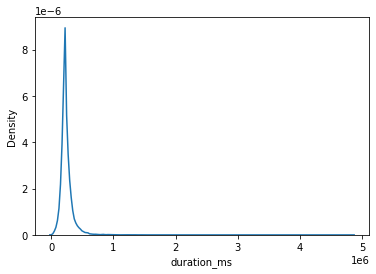

In [513]:
# Cuanto de normal es la variable 'duracion', lo veo con Q-Q plot
sns.kdeplot(train_total['duration_ms']);

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


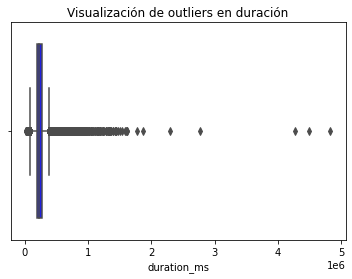

In [514]:
# Visualizo los outliers con un grafico de caja con bigotes
sns.boxplot(train_total['duration_ms'], color = 'b')
plt.title('Visualización de outliers en duración');

#### Voy a observar los outliers teniendo en cuenta los cuartiles Q1 y Q3 de la columna 'duracion_ms'

In [515]:
from scipy.stats import iqr

def outliers_quantie(df, feature, param=1.5):  
    '''
    Función que define los Q1 y Q3 de una muestra de datos para localizar los outliers 
    '''    
    iqr_ = iqr(df[feature], nan_policy='omit')
    
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    print('Límite corte inferior outliers:', th1)
    print('Límite corte superior outliers:', th2)
    outliers_inferiores = df[df[feature] < th1]
    outliers_superiores = df[df[feature] > th2]
    print('\nOutliers Inferiores')
    print(len(outliers_inferiores))
    maxinf = outliers_inferiores[feature].max()
    print('\nOutliers Superiores')
    print(len(outliers_superiores))
    minisup = outliers_superiores[feature].min()
    print('La duración minima del outlier:', round(minisup,2))
       
    return df[(df[feature] >= th1) & (df[feature] <= th2)], minisup, maxinf

train_no_out_dura, mili_cortesuperior, mili_corteinferior = outliers_quantie(train_total, 'duration_ms', 7)
print('La duración minima equivale a ', round(mili_cortesuperior* 1.66/100000,2), 'minutos')
print('\ntrain original tiene:', len(train_total), 'canciones')
print('train sin outliers tiene:', len(train_no_out_dura), 'canciones')
dif = len(train_total) - len(train_no_out_dura)
print('Diferencia:', dif)
print('Porcentaje sobre X_train:', round((dif/len(train_total))*100, 2),'%')

Límite corte inferior outliers: -320663.75
Límite corte superior outliers: 783437.5

Outliers Inferiores
0

Outliers Superiores
186
La duración minima del outlier: 786600.0
La duración minima equivale a  13.06 minutos

train original tiene: 40000 canciones
train sin outliers tiene: 39814 canciones
Diferencia: 186
Porcentaje sobre X_train: 0.46 %


In [516]:
train_no_out_dura.shape

(39814, 14)

In [517]:
# Que registros duran más de 16min
train_total[train_total['duration_ms'] >= mili_cortesuperior]

popularity  acousticness  danceability  duration_ms  energy  \
39087        37.0       0.00161        0.8890     860761.0  0.4800   
9701         14.0       0.97800        0.0977     964307.0  0.1210   
4230         30.0       0.38500        0.3520    1389372.0  0.7120   
29780        26.0       0.04670        0.5350     932493.0  0.5950   
36066        48.0       0.97300        0.3390     823787.0  0.2450   
...           ...           ...           ...          ...     ...   
5801         26.0       0.98300        0.3280     928787.0  0.1660   
38467        26.0       0.90600        0.2600    1147600.0  0.0411   
37504        33.0       0.55300        0.2430    1180560.0  0.3470   
17262        47.0       0.99400        0.4220     840387.0  0.0619   
11534        31.0       0.93100        0.1780     923720.0  0.1050   

       instrumentalness key  liveness  loudness   mode  speechiness  valence  \
39087            0.8350  A#    0.0514   -12.380  Minor       0.0747   0.0751   
9701             0.0328   B    0.0727   -23.341  Minor       0.0419   0.0393   
4230             0.5160   E    0.3190   -10.528  Minor       0.0512   0.2570   
29780            0.6440  C#    0.7070   -12.025  Major       0.0393   0.3560   
36066            0.9260  D#    0.1000   -18.292  Major       0.0364   0.1060   
...                 ...  ..       ...       ...    ...          ...      ...   
5801             0.9090   C    0.1180   -18.678  Minor       0.0372   0.1510   
38467            0.8350  D#    0.1050   -23.447  Major       0.0368   0.0809   
37504            0.9430   G    0.0828   -14.961  Major       0.0860   0.0377   
17262            0.6430   D    0.1340   -17.313  Major       0.0497   0.4140   
11534            0.9290   C    0.1680   -19.539  Minor       0.0360   0.0658   

      music_genre               tempo  
39087  Electronic  100.00200000000001  
9701    Classical              61.606  
4230        Blues  111.42299999999999  
29780       Blues             139.559  
36066   Classical                   ?  
...           ...                 ...  
5801    Classical             126.898  
38467   Classical             137.661  
37504  Electronic              73.722  
17262   Classical             136.039  
11534   Classical              84.225  

[186 rows x 14 columns]

In [518]:
largos = train_total[train_total['duration_ms'] >= mili_cortesuperior]

In [519]:
# Observo a que generos pertenecen las canciones largas

largos.groupby('music_genre').aggregate({'duration_ms': ['min', 'max', 'count']})


duration_ms                 
                    min        max count
music_genre                             
Anime          786600.0  1295600.0     6
Blues          787005.0  1509587.0    22
Classical      788400.0  2294000.0   129
Electronic     822640.0  4830606.0    13
Jazz           790560.0  1352413.0    15
Rock           811077.0   811077.0     1

In [520]:
train_total[train_total['duration_ms'] < mili_cortesuperior].groupby('music_genre').aggregate({'duration_ms': ['count']})

duration_ms
                  count
music_genre            
Alternative        3997
Anime              4004
Blues              3970
Classical          3902
Country            4014
Electronic         3978
Hip-Hop            3984
Jazz               4000
Rap                3977
Rock               3988

#### **Quitando los outliers, todavia tengo una muestra suficientemente balanceada de todos los géneros musicales**

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


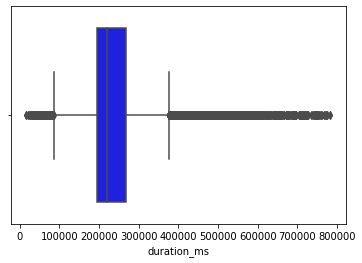

In [521]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_dura['duration_ms'], color= 'b');

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box-cox')

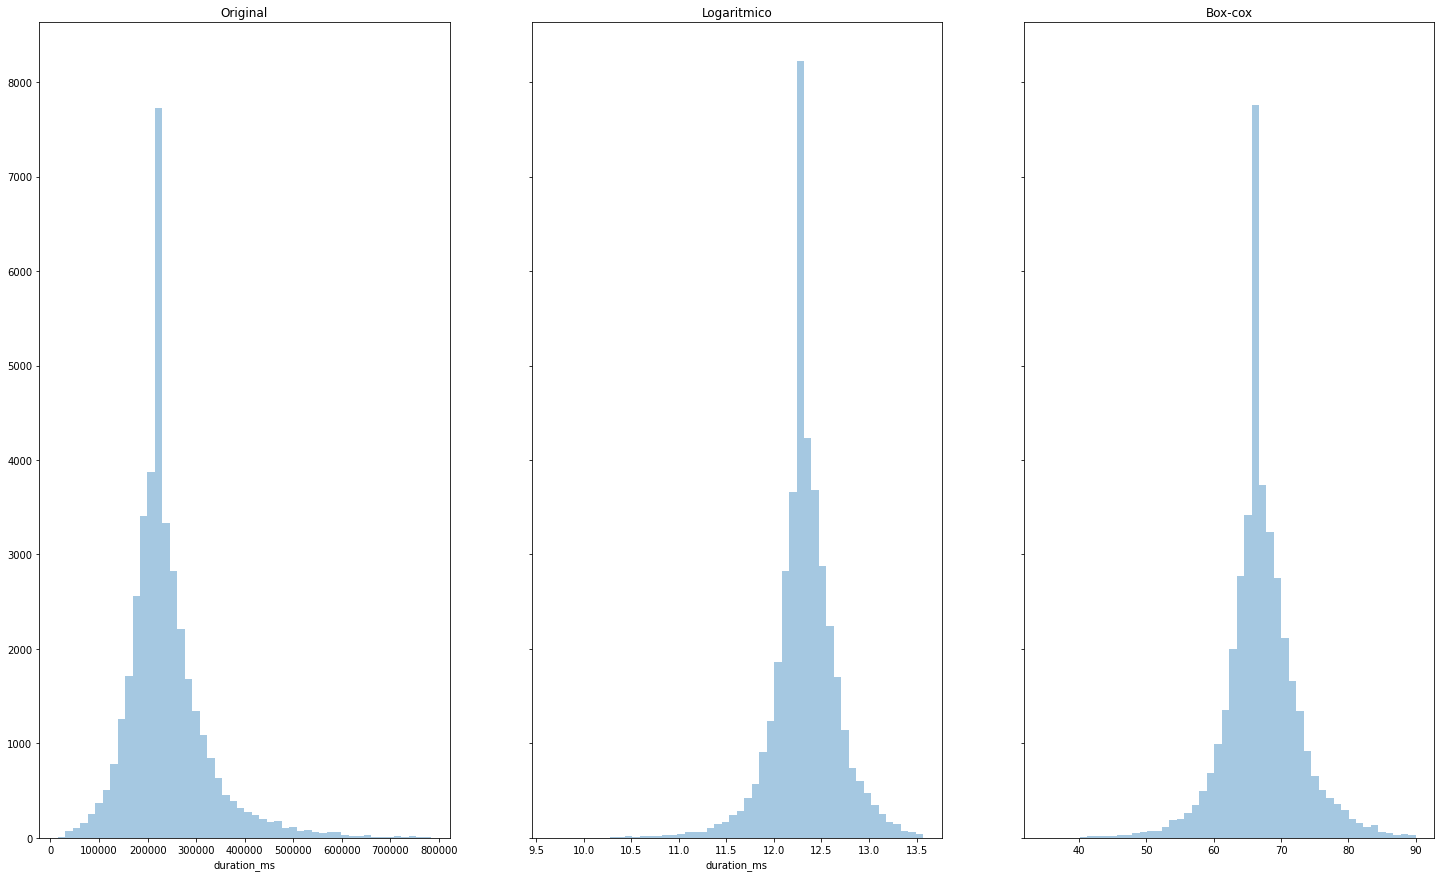

In [522]:
# Voy aplicarle varias transformaciones: logaritmica y Boxcox, para visualizar si mejora
from scipy import stats
fig, axes = plt.subplots(1, 3, figsize=(25,15), sharey=True)

# Original
sns.distplot(train_no_out_dura['duration_ms'], kde=False, ax=axes[0])
axes[0].set_title('Original')

# Logaritmic
sns.distplot(np.log(train_no_out_dura['duration_ms']), kde=False, ax=axes[1])
axes[1].set_title('Logaritmico')

# Box-cox
sns.distplot(stats.boxcox(train_no_out_dura['duration_ms'])[0], kde=False, ax=axes[2])
axes[2].set_title('Box-cox')


#### La original con la eliminación de outliers, ya es una distribución más centrada

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


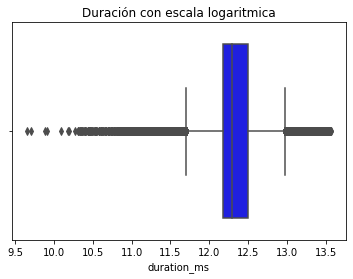

In [523]:
# Grafico de caja con bigotes con escala logaritmica
sns.boxplot(np.log(train_no_out_dura['duration_ms']), color= 'b')
plt.title('Duración con escala logaritmica');

#### Con la escala logaritmica se va demasiado hacia la derecha, así que de momento no voy a sustituirla

#### Me quedo con la distribución original sin los outliers

In [524]:
train_total= train_no_out_dura
train_total

popularity  acousticness  danceability  duration_ms  energy  \
30893        26.0      0.148000         0.481     345253.0  0.7760   
45278        21.0      0.960000         0.242     480013.0  0.1130   
16398        47.0      0.328000         0.798     219960.0  0.5380   
13653        39.0      0.031800         0.573     219019.0  0.7430   
13748        58.0      0.000006         0.427     265640.0  0.9060   
...           ...           ...           ...          ...     ...   
11284        43.0      0.930000         0.369     689520.0  0.0461   
44732        44.0      0.016100         0.683     182000.0  0.6800   
38158        42.0      0.004630         0.302     395653.0  0.9190   
860          40.0      0.000191         0.246     443267.0  0.9400   
15795        37.0      0.023700         0.617     211200.0  0.7200   

       instrumentalness key  liveness  loudness   mode  speechiness  valence  \
30893          0.000000   F    0.7190    -8.404  Minor       0.0388   0.3720   
45278          0.844000  D#    0.1130   -21.232  Major       0.0349   0.1170   
16398          0.002060   G    0.1820   -11.412  Major       0.0363   0.6770   
13653          0.000000   G    0.1520    -6.047  Minor       0.0374   0.6060   
13748          0.810000   A    0.1690    -3.488  Major       0.0472   0.5390   
...                 ...  ..       ...       ...    ...          ...      ...   
11284          0.000307   D    0.0403   -23.665  Major       0.0512   0.0375   
44732          0.000000  A#    0.3190    -5.861  Minor       0.0376   0.5570   
38158          0.000007   D    0.1280    -4.719  Major       0.1830   0.4990   
860            0.130000  F#    0.1470    -5.598  Minor       0.1670   0.3470   
15795          0.470000  G#    0.0840    -7.331  Minor       0.0347   0.0725   

       music_genre               tempo  
30893        Blues   98.37200000000001  
45278    Classical              80.195  
16398        Blues              81.018  
13653      Country  141.91899999999998  
13748  Alternative  133.92600000000002  
...            ...                 ...  
11284    Classical             135.674  
44732   Electronic             145.042  
38158  Alternative             172.946  
860           Jazz   94.17399999999999  
15795   Electronic              99.993  

[39814 rows x 14 columns]

In [525]:
train_total.shape

(39814, 14)

### 7.B. ZOOM y tratamiento columna 'mode'

In [526]:
# Visualizo en que 'modo' están dichos registros
train_total['mode'].value_counts()

Major    25609
Minor    14205
Name: mode, dtype: int64

#### Convierto columna de categórica a numérica con LabelEncoder

In [527]:
# Aplico Label encoding sobre 'mode'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_total['mode'] = le.fit_transform(train_total['mode'])


In [528]:
train_total['mode'].value_counts()

0    25609
1    14205
Name: mode, dtype: int64

### 7.C. ZOOM y tratamiento columna 'instrumentalness'

In [529]:
train_total['instrumentalness'].value_counts()

0.000000    11929
0.891000       56
0.898000       55
0.912000       54
0.897000       53
            ...  
0.068600        1
0.000817        1
0.000007        1
0.070300        1
0.324000        1
Name: instrumentalness, Length: 4990, dtype: int64

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


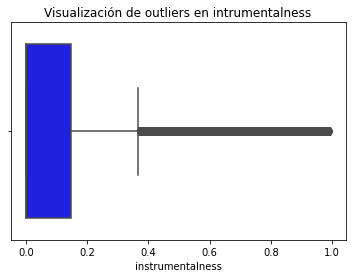

In [530]:
# Visualizo los outliers con un grafico de caja con bigotes
sns.boxplot(train_total['instrumentalness'], color = 'b')
plt.title('Visualización de outliers en intrumentalness');

In [531]:
# Visualizo los outliers en base a los Q1 y Q3 de instrumentalness
train_no_out_instru, ins_cortesuperior, ins_corteinferior = outliers_quantie(train_total, 'instrumentalness', 5.7)

print('\ntrain original tiene:', len(train_total), 'canciones')
print('train sin outliers tiene:', len(train_no_out_instru), 'canciones')
dif = len(train_total) - len(train_no_out_instru)
print('Diferencia:', dif)
print('Porcentaje sobre train:', round((dif/len(train_total))*100, 2),'%')

Límite corte inferior outliers: -0.8379
Límite corte superior outliers: 0.9849

Outliers Inferiores
0

Outliers Superiores
20
La duración minima del outlier: 0.98

train original tiene: 39814 canciones
train sin outliers tiene: 39794 canciones
Diferencia: 20
Porcentaje sobre train: 0.05 %


In [532]:
train_total['instrumentalness'].max()

0.994

In [533]:
train_total[train_total['instrumentalness'] >= ins_cortesuperior]

popularity  acousticness  danceability  duration_ms  energy  \
33386        15.0      0.871000         0.285      38193.0  0.5740   
9858         40.0      0.980000         0.160     149200.0  0.0345   
44082        19.0      0.863000         0.427     219019.0  0.3060   
5599         12.0      0.574000         0.598      90600.0  0.4550   
36317        13.0      0.898000         0.204     137327.0  0.2680   
47998        26.0      0.988000         0.179     144973.0  0.0805   
43272        17.0      0.000035         0.219      44387.0  0.4230   
29737        32.0      0.967000         0.297     191054.0  0.1150   
5835         14.0      0.299000         0.408     219019.0  0.2920   
41332        20.0      0.509000         0.212     319553.0  0.3430   
43216        18.0      0.164000         0.185      81833.0  0.4780   
46487        17.0      0.991000         0.498      35015.0  0.3780   
1301         15.0      0.547000         0.597     148317.0  0.4190   
41282        40.0      0.977000         0.107     136320.0  0.0102   
17400        13.0      0.639000         0.387     109267.0  0.2750   
45858        38.0      0.986000         0.151     313253.0  0.0217   
22207        34.0      0.675000         0.493      42893.0  0.0249   
2469         11.0      0.126000         0.376     122480.0  0.8240   
41975        32.0      0.944000         0.138     106800.0  0.0384   
47030        21.0      0.578000         0.264     163667.0  0.2310   

       instrumentalness key  liveness  loudness  mode  speechiness  valence  \
33386             0.992   C    0.0933   -13.486     0       0.0423   0.2490   
9858              0.989  A#    0.0742   -28.318     0       0.0399   0.0341   
44082             0.987   C    0.3850   -13.728     0       0.0421   0.0381   
5599              0.993  F#    0.1470   -10.589     1       0.0473   0.7850   
36317             0.986   E    0.1160   -16.878     1       0.0364   0.0386   
47998             0.988   G    0.1140   -23.086     0       0.0386   0.0543   
43272             0.985  G#    0.2070   -11.224     0       0.0402   0.1710   
29737             0.985  D#    0.1250   -15.811     0       0.0371   0.1760   
5835              0.992  G#    0.4260   -14.213     0       0.0359   0.9900   
41332             0.986  F#    0.0802   -11.749     0       0.0337   0.1520   
43216             0.988  F#    0.0708    -5.498     1       0.0332   0.0383   
46487             0.986  C#    0.6070   -17.088     1       0.0345   0.7020   
1301              0.985   A    0.2210   -11.000     1       0.0370   0.5320   
41282             0.994   D    0.0951   -32.462     1       0.0505   0.0321   
17400             0.987   G    0.1030   -15.041     0       0.0513   0.2540   
45858             0.987   F    0.0886   -38.777     1       0.0349   0.0482   
22207             0.993  D#    0.5700   -32.122     0       0.0446   0.1110   
2469              0.985  C#    0.1100    -7.480     0       0.0481   0.8570   
41975             0.987   C    0.1060   -31.042     0       0.0411   0.0637   
47030             0.985   A    0.1960    -9.611     1       0.0338   0.0626   

      music_genre              tempo  
33386       Anime             90.285  
9858    Classical                  ?  
44082       Anime             67.146  
5599        Anime            123.425  
36317       Anime            129.484  
47998       Anime             66.987  
43272       Anime             99.639  
29737        Jazz             105.77  
5835        Anime            150.495  
41332  Electronic            158.878  
43216       Anime             76.125  
46487   Classical             116.96  
1301        Anime            119.931  
41282   Classical  80.90100000000001  
17400       Anime  90.14399999999999  
45858   Classical             78.666  
22207   Classical            114.786  
2469        Anime            133.154  
41975   Classical            141.929  
47030       Anime             60.345

In [534]:
# Visualizo las canciones con un nivel de instrumentaless muy alto, es decir los outliers a que genero pertenecen
train_total[train_total['instrumentalness'] >= ins_cortesuperior].groupby('music_genre').aggregate({'instrumentalness': ['min', 'max', 'count']})

instrumentalness             
                         min    max count
music_genre                              
Anime                  0.985  0.993    12
Classical              0.986  0.994     6
Electronic             0.986  0.986     1
Jazz                   0.985  0.985     1

In [535]:
train_total[(train_total['instrumentalness'] < ins_cortesuperior) & (train_total['duration_ms'] < mili_cortesuperior)].groupby('music_genre').aggregate({'instrumentalness': ['count']})


instrumentalness
                       count
music_genre                 
Alternative             3997
Anime                   3992
Blues                   3970
Classical               3896
Country                 4014
Electronic              3977
Hip-Hop                 3984
Jazz                    3999
Rap                     3977
Rock                    3988

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='instrumentalness'>

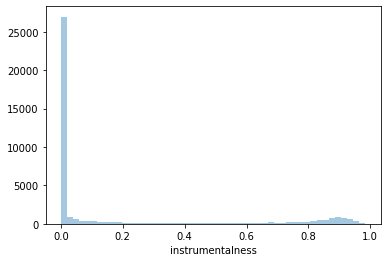

In [536]:
sns.distplot(train_no_out_instru['instrumentalness'], kde=False)

Su distribución sigue estando lejos de ser gaussiana

In [537]:
media_instru = train_total['instrumentalness'].mean()

In [538]:
train_no_out_instru =train_no_out_instru.replace(0.000000, media_instru)
train_no_out_instru['instrumentalness'].value_counts()

0.179818    11929
0.891000       56
0.898000       55
0.912000       54
0.897000       53
            ...  
0.096600        1
0.000008        1
0.000071        1
0.059900        1
0.324000        1
Name: instrumentalness, Length: 4982, dtype: int64

<AxesSubplot:xlabel='instrumentalness'>

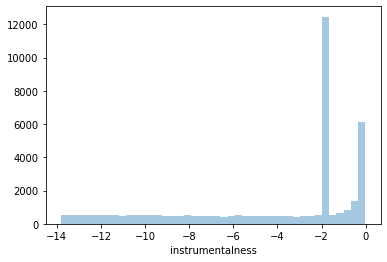

In [539]:
# Aplico transformacion logaritmica
sns.distplot(np.log(train_no_out_instru['instrumentalness']), kde=False)


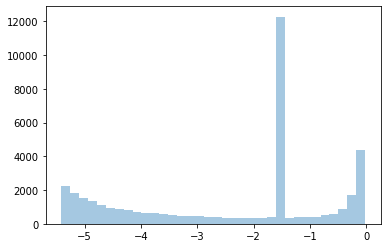

In [540]:
# Aplico transformacion  boxcox
sns.distplot(stats.boxcox(train_no_out_instru['instrumentalness'])[0], kde=False);

In [541]:
train_no_out_instru['instrumentalness'] = stats.boxcox(train_no_out_instru['instrumentalness'])[0]

In [542]:
train_total = train_no_out_instru

In [543]:
train_total

popularity  acousticness  danceability  duration_ms  energy  \
30893        26.0      0.148000         0.481     345253.0  0.7760   
45278        21.0      0.960000         0.242     480013.0  0.1130   
16398        47.0      0.328000         0.798     219960.0  0.5380   
13653        39.0      0.031800         0.573     219019.0  0.7430   
13748        58.0      0.000006         0.427     265640.0  0.9060   
...           ...           ...           ...          ...     ...   
11284        43.0      0.930000         0.369     689520.0  0.0461   
44732        44.0      0.016100         0.683     182000.0  0.6800   
38158        42.0      0.004630         0.302     395653.0  0.9190   
860          40.0      0.000191         0.246     443267.0  0.9400   
15795        37.0      0.023700         0.617     211200.0  0.7200   

       instrumentalness key  liveness  loudness      mode  speechiness  \
30893         -1.493326   F    0.7190    -8.404  1.000000       0.0388   
45278         -0.167240  D#    0.1130   -21.232  0.179818       0.0349   
16398         -3.868285   G    0.1820   -11.412  0.179818       0.0363   
13653         -1.493326   G    0.1520    -6.047  1.000000       0.0374   
13748         -0.207082   A    0.1690    -3.488  0.179818       0.0472   
...                 ...  ..       ...       ...       ...          ...   
11284         -4.453690   D    0.0403   -23.665  0.179818       0.0512   
44732         -1.493326  A#    0.3190    -5.861  1.000000       0.0376   
38158         -5.189563   D    0.1280    -4.719  0.179818       0.1830   
860           -1.730964  F#    0.1470    -5.598  1.000000       0.1670   
15795         -0.709674  G#    0.0840    -7.331  1.000000       0.0347   

       valence  music_genre               tempo  
30893   0.3720        Blues   98.37200000000001  
45278   0.1170    Classical              80.195  
16398   0.6770        Blues              81.018  
13653   0.6060      Country  141.91899999999998  
13748   0.5390  Alternative  133.92600000000002  
...        ...          ...                 ...  
11284   0.0375    Classical             135.674  
44732   0.5570   Electronic             145.042  
38158   0.4990  Alternative             172.946  
860     0.3470         Jazz   94.17399999999999  
15795   0.0725   Electronic              99.993  

[39794 rows x 14 columns]

### 7.D. ZOOM y tratamiento columna 'liveness'(si se grabaron o no en vivo)

In [544]:
train_total['liveness'].value_counts()

0.1100    500
0.1110    488
0.1080    471
0.1090    445
0.1120    433
         ... 
0.0209      1
0.0299      1
0.0232      1
0.8790      1
0.9130      1
Name: liveness, Length: 1610, dtype: int64

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


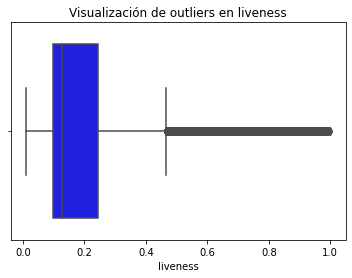

In [545]:
# Visualizo los outliers con un grafico de caja con bigotes
sns.boxplot(train_total['liveness'], color = 'b')
plt.title('Visualización de outliers en liveness');

In [546]:
# Visualizo los outliers en base a los Q1 y Q3 de liveness
train_no_out_live, live_cortesuperior, live_corteinferior = outliers_quantie(train_total, 'liveness', 5)

print('\ntrain original tiene:', len(train_total), 'canciones')
print('train sin outliers tiene:', len(train_no_out_live), 'canciones')
dif = len(train_total) - len(train_no_out_live)
print('Diferencia:', dif)
print('Porcentaje sobre train:', round((dif/len(train_total))*100, 2),'%')

Límite corte inferior outliers: -0.6392
Límite corte superior outliers: 0.98

Outliers Inferiores
0

Outliers Superiores
29
La duración minima del outlier: 0.98

train original tiene: 39794 canciones
train sin outliers tiene: 39765 canciones
Diferencia: 29
Porcentaje sobre train: 0.07 %


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


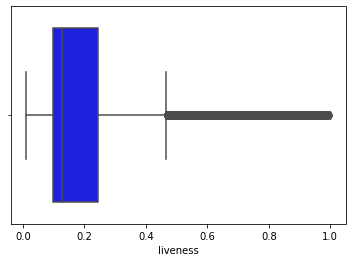

In [547]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_dura['liveness'], color= 'b');

In [548]:
# Visualizo las canciones con un nivel de liveness muy alto, es decir los outliers a que genero pertenecen
train_total[train_total['liveness'] >= live_cortesuperior].groupby('music_genre').aggregate({'liveness': ['min', 'max', 'count']})

liveness             
                 min    max count
music_genre                      
Alternative    0.988  0.996     2
Blues          0.981  1.000    19
Classical      0.987  0.987     1
Country        0.982  0.986     3
Electronic     0.983  0.984     2
Rap            0.989  0.989     1
Rock           0.991  0.991     1

In [549]:
# Que proporcion de canciones agrupadas por genero me quedarian quitando los outliers de liveness
train_total[(train_total['instrumentalness'] < ins_cortesuperior) & (train_total['duration_ms'] < mili_cortesuperior) & (train_total['liveness'] < live_cortesuperior)].groupby('music_genre').aggregate({'liveness': ['count']})

liveness
               count
music_genre         
Alternative     3995
Anime           3992
Blues           3951
Classical       3895
Country         4011
Electronic      3975
Hip-Hop         3984
Jazz            3999
Rap             3976
Rock            3987

#### **Quitando los outliers, todavia tengo una muestra suficientemente balanceada de todos los géneros musicales**

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


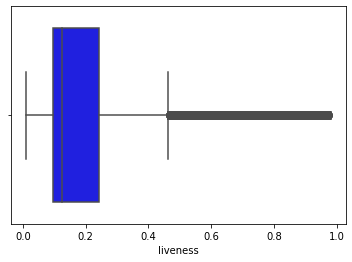

In [550]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_live['liveness'], color= 'b');

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='liveness'>

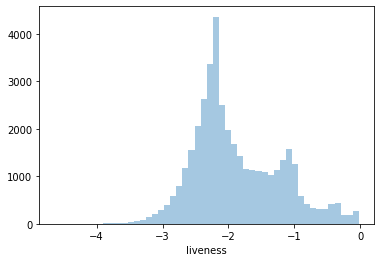

In [551]:
# Aplico transformacion logaritmica
sns.distplot(np.log(train_no_out_live['liveness']), kde=False)


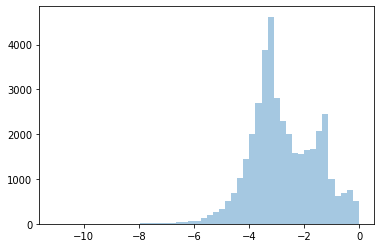

In [552]:
# Aplico transformacion  boxcox
sns.distplot(stats.boxcox(train_no_out_live['liveness'])[0], kde=False);

#### Me quedo con la transformación logaritmica que es la que tiene mejor distribución

In [553]:
train_no_out_live['liveness']= np.log(train_no_out_live['liveness'])

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [554]:
train_total = train_no_out_live
train_total.head()

popularity  acousticness  danceability  duration_ms  energy  \
30893        26.0      0.148000         0.481     345253.0   0.776   
45278        21.0      0.960000         0.242     480013.0   0.113   
16398        47.0      0.328000         0.798     219960.0   0.538   
13653        39.0      0.031800         0.573     219019.0   0.743   
13748        58.0      0.000006         0.427     265640.0   0.906   

       instrumentalness key  liveness  loudness      mode  speechiness  \
30893         -1.493326   F -0.329894    -8.404  1.000000       0.0388   
45278         -0.167240  D# -2.180367   -21.232  0.179818       0.0349   
16398         -3.868285   G -1.703749   -11.412  0.179818       0.0363   
13653         -1.493326   G -1.883875    -6.047  1.000000       0.0374   
13748         -0.207082   A -1.777857    -3.488  0.179818       0.0472   

       valence  music_genre               tempo  
30893    0.372        Blues   98.37200000000001  
45278    0.117    Classical              80.195  
16398    0.677        Blues              81.018  
13653    0.606      Country  141.91899999999998  
13748    0.539  Alternative  133.92600000000002

In [555]:
train_total.shape

(39765, 14)

### 7.E. ZOOM y tratamiento columna 'key'

In [556]:
# Visualizo en que escalas están dichos registros
train_total['key'].value_counts()

G     4565
C     4416
C#    4334
D     4161
A     3826
F     3436
B     3042
E     2959
A#    2658
G#    2633
F#    2492
D#    1243
Name: key, dtype: int64

Escala musical
(Español - Inglés)

* DO --> C
* RE --> D
* MI --> E
* FA --> F
* SOL --> G
* LA --> A
* SI --> B

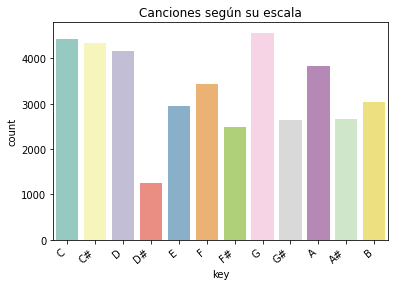

In [557]:
ax = sns.countplot(x= train_total["key"], order=["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"],palette="Set3")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
plt.title("Canciones según su escala");

In [558]:
def esc_esp(x):
    x = x.lower()
    if x == 'c':
        x ='DO'
    elif x == 'c#':
        x ='DO#'
    elif x == 'd':
        x ='RE'
    elif x == 'd#':
        x ='RE#'
    elif x == 'e':
        x ='MI'
    elif x == 'f':
        x ='FA'
    elif x == 'f#':
        x ='FA#'
    elif x == 'g':
        x ='SOL'
    elif x == 'g#':
        x ='SOL#'
    elif x == 'a':
        x = 'LA'
    elif x == 'a#':
        x ='LA#'
    elif x == 'b':
        x = 'SI'
    return x

train_total['key'] = train_total['key'].apply(esc_esp)

train_total['key']

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


30893      FA
45278     RE#
16398     SOL
13653     SOL
13748      LA
         ... 
11284      RE
44732     LA#
38158      RE
860       FA#
15795    SOL#
Name: key, Length: 39765, dtype: object

In [559]:
train_total['key'].value_counts()

SOL     4565
DO      4416
DO#     4334
RE      4161
LA      3826
FA      3436
SI      3042
MI      2959
LA#     2658
SOL#    2633
FA#     2492
RE#     1243
Name: key, dtype: int64

In [560]:
# Hago un get_dummies para separar por columnas, eliminando la primera para evitar colinealidad
train_total = pd.get_dummies(train_total, columns = ['key'], drop_first = True)

train_total.head()

popularity  acousticness  danceability  duration_ms  energy  \
30893        26.0      0.148000         0.481     345253.0   0.776   
45278        21.0      0.960000         0.242     480013.0   0.113   
16398        47.0      0.328000         0.798     219960.0   0.538   
13653        39.0      0.031800         0.573     219019.0   0.743   
13748        58.0      0.000006         0.427     265640.0   0.906   

       instrumentalness  liveness  loudness      mode  speechiness  ...  \
30893         -1.493326 -0.329894    -8.404  1.000000       0.0388  ...   
45278         -0.167240 -2.180367   -21.232  0.179818       0.0349  ...   
16398         -3.868285 -1.703749   -11.412  0.179818       0.0363  ...   
13653         -1.493326 -1.883875    -6.047  1.000000       0.0374  ...   
13748         -0.207082 -1.777857    -3.488  0.179818       0.0472  ...   

       key_FA key_FA# key_LA  key_LA#  key_MI  key_RE  key_RE#  key_SI  \
30893       1       0      0        0       0       0        0       0   
45278       0       0      0        0       0       0        1       0   
16398       0       0      0        0       0       0        0       0   
13653       0       0      0        0       0       0        0       0   
13748       0       0      1        0       0       0        0       0   

       key_SOL  key_SOL#  
30893        0         0  
45278        0         0  
16398        1         0  
13653        1         0  
13748        0         0  

[5 rows x 24 columns]

In [561]:
train_total.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'valence', 'music_genre', 'tempo', 'key_DO#', 'key_FA', 'key_FA#',
       'key_LA', 'key_LA#', 'key_MI', 'key_RE', 'key_RE#', 'key_SI', 'key_SOL',
       'key_SOL#'],
      dtype='object')

### 7.F. ZOOM y tratamiento columna 'tempo'

##### Quiero dejar la columna tempo en el lugar que estaba originalmente

In [562]:
train_total = train_total[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'valence', 'music_genre', 'key_DO#', 'key_FA', 'key_FA#',
       'key_LA', 'key_LA#', 'key_MI', 'key_RE', 'key_RE#', 'key_SI', 'key_SOL',
       'key_SOL#']]

In [563]:
train_total.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'music_genre', 'key_DO#', 'key_FA', 'key_FA#',
       'key_LA', 'key_LA#', 'key_MI', 'key_RE', 'key_RE#', 'key_SI', 'key_SOL',
       'key_SOL#'],
      dtype='object')

In [564]:
# Veo que valores contiene 'tempo'
train_total['tempo'].value_counts()

?                     3937
140.007                 17
120.0                   14
100.00200000000001      14
100.00299999999999      13
                      ... 
184.007                  1
168.023                  1
119.90799999999999       1
92.10700000000001        1
94.17399999999999        1
Name: tempo, Length: 24888, dtype: int64

In [565]:
# Sustituyo '?' por tempo negativo, no posible
train_total['tempo'] = train_total['tempo'].str.replace('?', '-1.5')

train_total['tempo'].value_counts()

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


-1.5                  3937
140.007                 17
120.0                   14
100.00200000000001      14
100.00299999999999      13
                      ... 
184.007                  1
168.023                  1
119.90799999999999       1
92.10700000000001        1
94.17399999999999        1
Name: tempo, Length: 24888, dtype: int64

In [566]:
# Convierto variable 'tempo' a float
train_total['tempo'] = np.round(train_total['tempo'].astype(float), 2)
train_total['tempo'].value_counts()

-1.50      3937
 120.00      90
 100.00      81
 120.02      76
 140.00      73
           ... 
 196.22       1
 195.02       1
 71.90        1
 144.33       1
 156.73       1
Name: tempo, Length: 9960, dtype: int64

In [567]:
# Extraigo las canciones sin tempo que ahora valen -1.5
sin_tempo = train_total[(train_total['tempo']==-1.5)].index
train_contempo = train_total.drop(index = sin_tempo)

In [568]:
# Calculo la mediana del tempo
mediana_tempo = train_contempo['tempo'].median()
mediana_tempo

119.91

In [569]:
# A las canciones sin tempo les pongo el tempo obtenido como la mediana de train
train_total['tempo'] = train_total['tempo'].replace(-1.5, mediana_tempo)

train_total['tempo'].value_counts()


119.91    3944
120.00      90
100.00      81
120.02      76
140.00      73
          ... 
196.22       1
195.02       1
71.90        1
144.33       1
156.73       1
Name: tempo, Length: 9959, dtype: int64

In [570]:
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39765 entries, 30893 to 15795
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        39765 non-null  float64
 1   acousticness      39765 non-null  float64
 2   danceability      39765 non-null  float64
 3   duration_ms       39765 non-null  float64
 4   energy            39765 non-null  float64
 5   instrumentalness  39765 non-null  float64
 6   liveness          39765 non-null  float64
 7   loudness          39765 non-null  float64
 8   mode              39765 non-null  float64
 9   speechiness       39765 non-null  float64
 10  tempo             39765 non-null  float64
 11  valence           39765 non-null  float64
 12  music_genre       39765 non-null  object 
 13  key_DO#           39765 non-null  uint8  
 14  key_FA            39765 non-null  uint8  
 15  key_FA#           39765 non-null  uint8  
 16  key_LA            39765 non-null  ui

#### De momento no voy a tocar mas columnas, ya vere mas adelante si se necesita ver los outliers haciendo ZOOM y tratamiento de columnas 'loudness'(volumen al que estan grabadas) y 'speechiness'

### 7.G. ZOOM y tratamiento columna 'loudness'

In [571]:
train_total['loudness'].value_counts()

-5.443     16
-5.587     15
-5.013     14
-5.381     14
-5.698     14
           ..
 0.713      1
-14.299     1
-12.089     1
-16.580     1
-23.665     1
Name: loudness, Length: 15612, dtype: int64

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


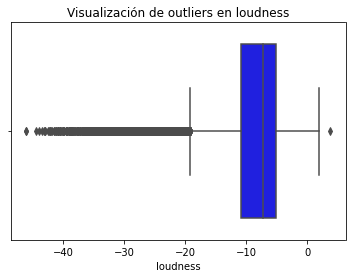

In [572]:
# Visualizo los outliers con un grafico de caja con bigotes
sns.boxplot(train_total['loudness'], color = 'b')
plt.title('Visualización de outliers en loudness');

In [573]:
# Visualizo los outliers en base a los Q1 y Q3 de loudness
train_no_out_loud, loud_cortesuperior, loud_corteinferior = outliers_quantie(train_total, 'loudness', 5)

print('\ntrain original tiene:', len(train_total), 'canciones')
print('train sin outliers tiene:', len(train_no_out_loud), 'canciones')
dif = len(train_total) - len(train_no_out_loud)
print('Diferencia:', dif)
print('Porcentaje sobre train:', round((dif/len(train_total))*100, 2),'%')

Límite corte inferior outliers: -39.004999999999995
Límite corte superior outliers: 23.035

Outliers Inferiores
46

Outliers Superiores
0
La duración minima del outlier: nan

train original tiene: 39765 canciones
train sin outliers tiene: 39719 canciones
Diferencia: 46
Porcentaje sobre train: 0.12 %


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


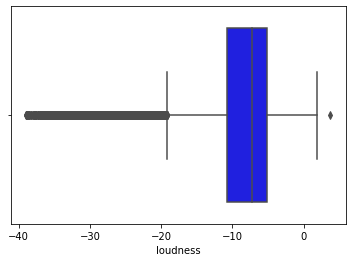

In [574]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_loud['loudness'], color= 'b');

In [575]:
# Visualizo las canciones con un nivel de loudness muy alto, es decir los outliers a que genero pertenecen
train_total[train_total['loudness'] <= loud_corteinferior].groupby('music_genre').aggregate({'loudness': ['min', 'max', 'count']})

loudness              
                 min     max count
music_genre                       
Anime        -41.234 -39.194     3
Classical    -46.122 -39.064    43

In [576]:
# Que proporcion de canciones agrupadas por genero me quedarian quitando los outliers de loudness
train_total[(train_total['instrumentalness'] < ins_cortesuperior) & (train_total['duration_ms'] < mili_cortesuperior) & (train_total['liveness'] < live_cortesuperior) & (train_total['loudness'] > loud_corteinferior)].groupby('music_genre').aggregate({'loudness': ['count']})

loudness
               count
music_genre         
Alternative     3995
Anime           3989
Blues           3951
Classical       3852
Country         4011
Electronic      3975
Hip-Hop         3984
Jazz            3999
Rap             3976
Rock            3987

#### **Quitando los outliers, todavia tengo una muestra suficientemente balanceada de todos los géneros musicales**

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


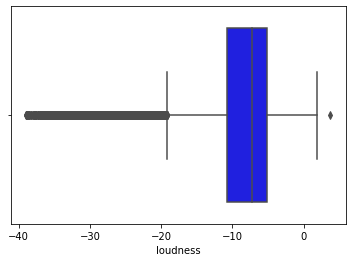

In [577]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_loud['loudness'], color= 'b');

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loudness'>

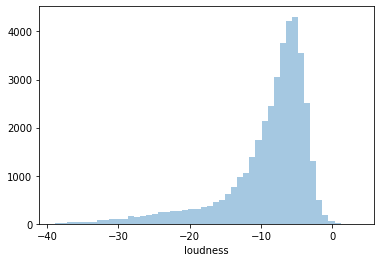

In [578]:
# Aplico transformacion logaritmica
sns.distplot(train_no_out_loud['loudness'], kde=False)

In [579]:
train_total = train_no_out_loud
train_total.head()

popularity  acousticness  danceability  duration_ms  energy  \
30893        26.0      0.148000         0.481     345253.0   0.776   
45278        21.0      0.960000         0.242     480013.0   0.113   
16398        47.0      0.328000         0.798     219960.0   0.538   
13653        39.0      0.031800         0.573     219019.0   0.743   
13748        58.0      0.000006         0.427     265640.0   0.906   

       instrumentalness  liveness  loudness      mode  speechiness  ...  \
30893         -1.493326 -0.329894    -8.404  1.000000       0.0388  ...   
45278         -0.167240 -2.180367   -21.232  0.179818       0.0349  ...   
16398         -3.868285 -1.703749   -11.412  0.179818       0.0363  ...   
13653         -1.493326 -1.883875    -6.047  1.000000       0.0374  ...   
13748         -0.207082 -1.777857    -3.488  0.179818       0.0472  ...   

       key_FA  key_FA# key_LA  key_LA#  key_MI  key_RE  key_RE#  key_SI  \
30893       1        0      0        0       0       0        0       0   
45278       0        0      0        0       0       0        1       0   
16398       0        0      0        0       0       0        0       0   
13653       0        0      0        0       0       0        0       0   
13748       0        0      1        0       0       0        0       0   

       key_SOL  key_SOL#  
30893        0         0  
45278        0         0  
16398        1         0  
13653        1         0  
13748        0         0  

[5 rows x 24 columns]

In [580]:
train_total.shape

(39719, 24)

In [581]:
train_total.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'music_genre', 'key_DO#', 'key_FA', 'key_FA#',
       'key_LA', 'key_LA#', 'key_MI', 'key_RE', 'key_RE#', 'key_SI', 'key_SOL',
       'key_SOL#'],
      dtype='object')

## 8. Visualizaciones de Features vs Target en TRAIN

### 8.A.Popularity

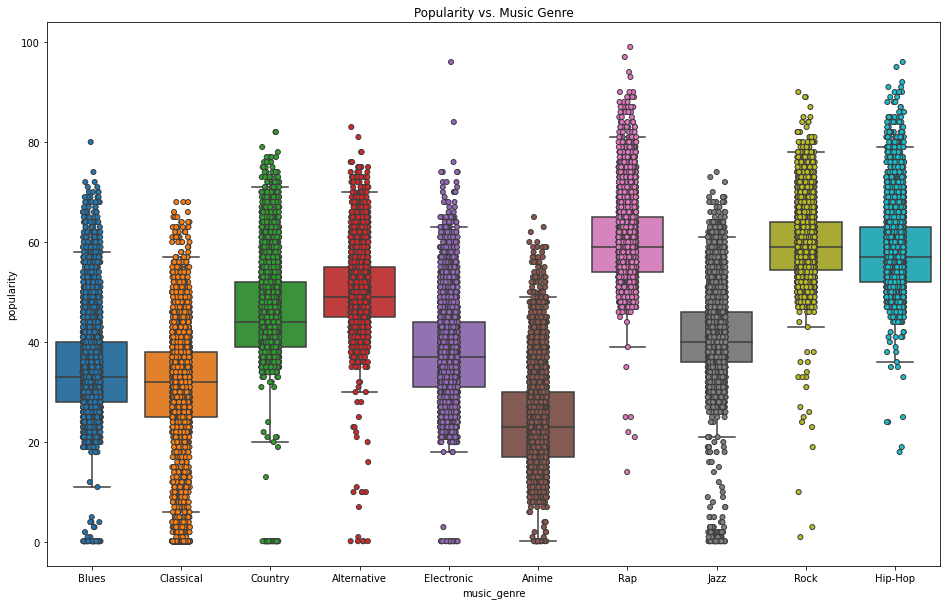

In [582]:
# Grafico box plot y de enjambre
plt.figure(figsize=(16,10))
sns.stripplot(x='music_genre', y='popularity', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='popularity', data=train_total,fliersize=0)
plt.title("Popularity vs. Music Genre");

#### Los generos con **mayor popularidad, Rap, Rock y HipHop**, tienen el 50% de las canciones concentradas en la misma popularidad y una mediana muy similar

####  

### 8.B. Acousticness

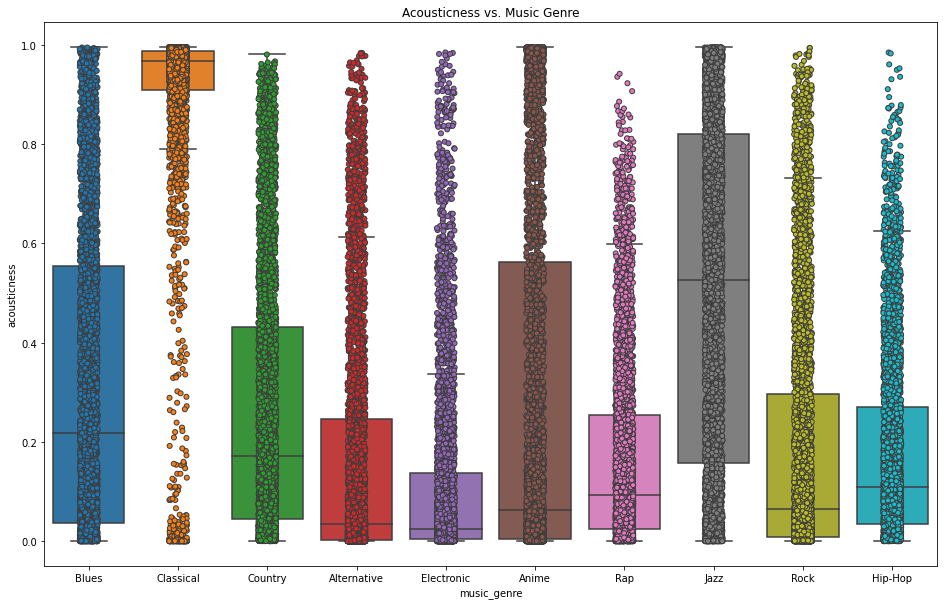

In [583]:
plt.figure(figsize=(16,10))
sns.stripplot(x='music_genre', y='acousticness', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='acousticness', data=train_total,fliersize=0)
plt.title("Acousticness vs. Music Genre");

#### Como era esperable, el género de **música clásica concentra los mayores valores de acústica**, dado que la base de su sonoridad está en los instrumetos musicales tradicionales. Es algo que la diferencia claramentedle resto de géneros musicales.

#### Sorprende ver que hay **3 géneros, Blues, Anime y Jazz**, donde **destaca la dispersión en acústica de sus canciones**.

### 8.C. Danceability

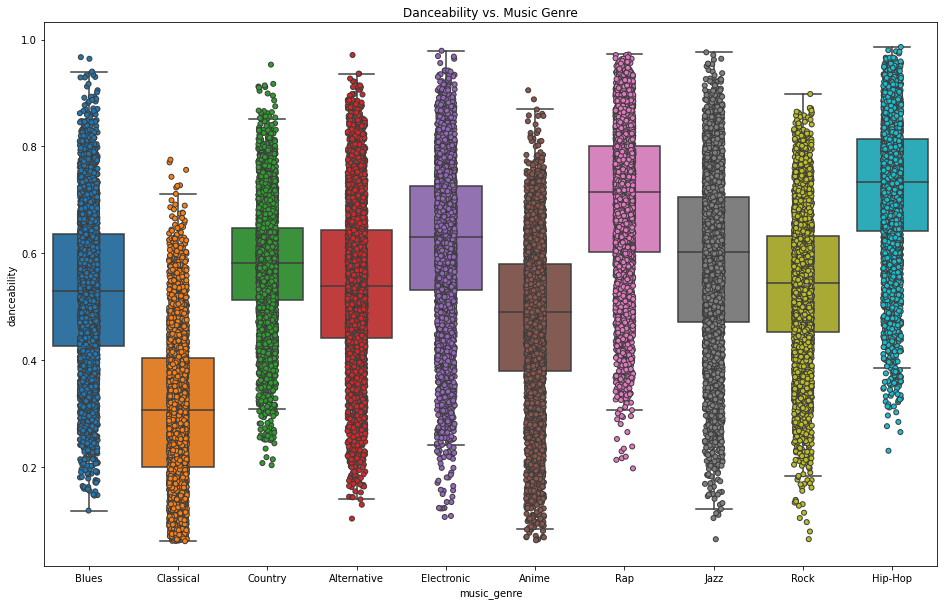

In [584]:
plt.figure(figsize=(16,10))
sns.stripplot(x='music_genre', y='danceability', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='danceability', data=train_total,fliersize=0)
plt.title("Danceability vs. Music Genre");

#### Todos los géneros tienen una **dispersión muy similar en cuanto a su bailabilidad**, aunque la que menos sería musica clasica y la Anime vs las que más que son el Rap y HipHop

### 8.D. Duration

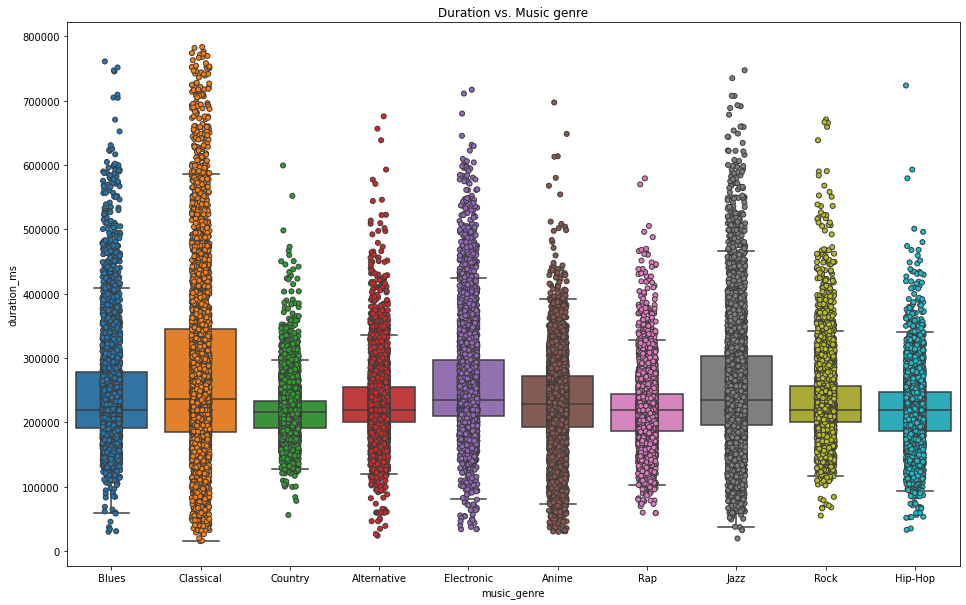

In [585]:

plt.figure(figsize=(16,10))
sns.stripplot(x='music_genre', y='duration_ms', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='duration_ms', data=train_total,fliersize=0)
plt.title("Duration vs. Music genre");

#### Claramente se aprecia como el **género de clásica tiene mayor dispersión**, ya que un número bastante superior de sus canciones tienen una duración mas extensa. Esto se debe a que gran parte de su repertorio representa una época pasada donde la **duración era un simbolo de trascendecia**queriendo demostrar sus autores la superioridad espiritual de las naciones de origen, algunos compositores se verán tentados por la posibilidad de contribuir a ambos (así como, de paso, a su gloria personal) llevando al límite la técnica instrumental, incrementando la plantilla orquestal, aumentando la complejidad armónica, o, como no, rebasando los límites temporales hasta la fecha conocidos.

### 8.E. Energy

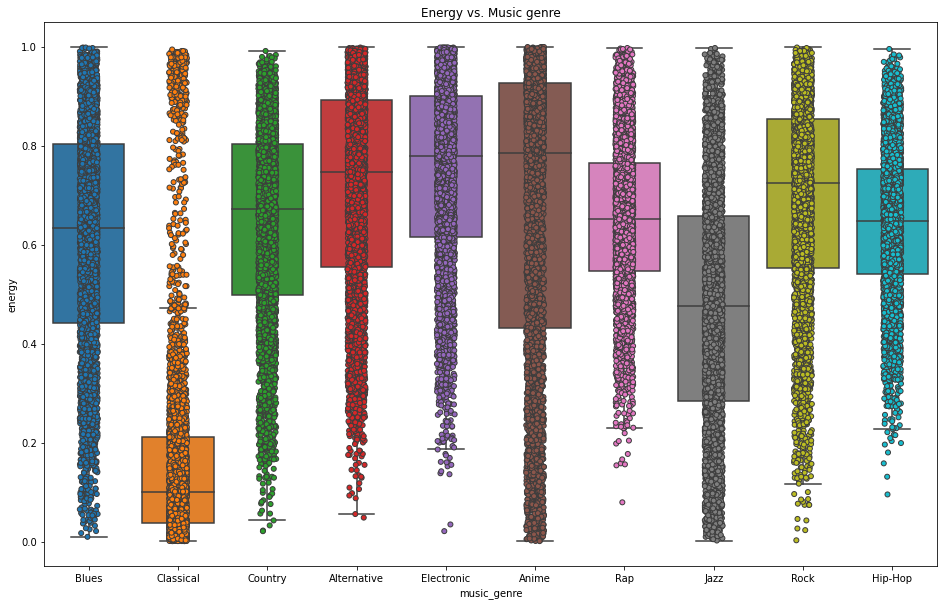

In [586]:

plt.figure(figsize=(16,10))
sns.stripplot(x='music_genre', y='energy', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='energy', data=train_total,fliersize=0)
plt.title("Energy vs. Music genre");

#### Los generos con mayor energia son Alternative, electronico y anime, aunque la disperion de este ultimo génro es mayor. Y de nuevo destaca la musica clasica con menor puntuacion en energia

### 8.F. Instrumentalness

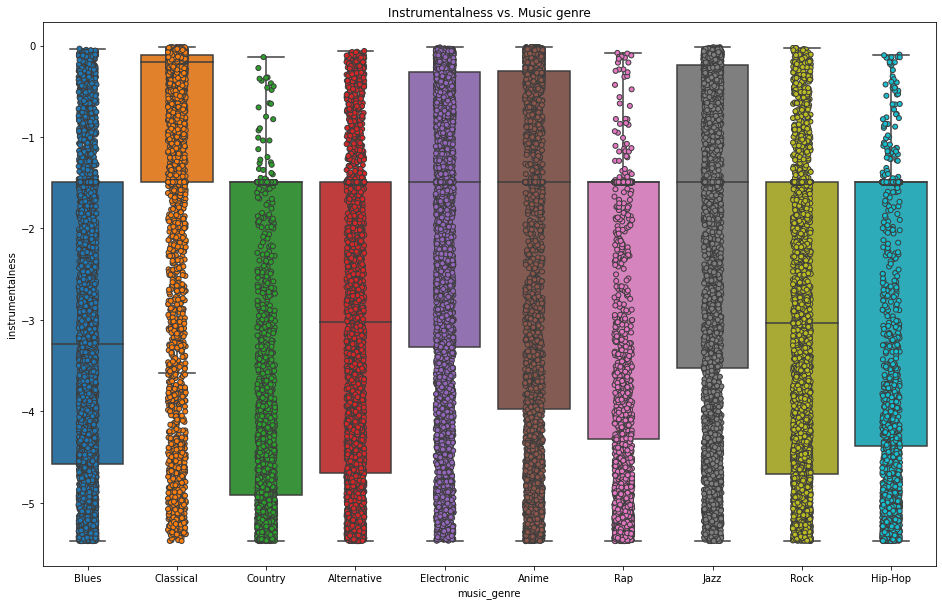

In [587]:
plt.figure(figsize=(16,10))
sns.stripplot(x='music_genre', y='instrumentalness', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='instrumentalness', data=train_total,fliersize=0)
plt.title("Instrumentalness vs. Music genre");

#### A pesar de que en todos los génros hay una gran dispersión, si se ve claramente como **géneros con mayor instrumentalización la música clasica, electrónica, anime y jazz**

### 8.G. Liveness

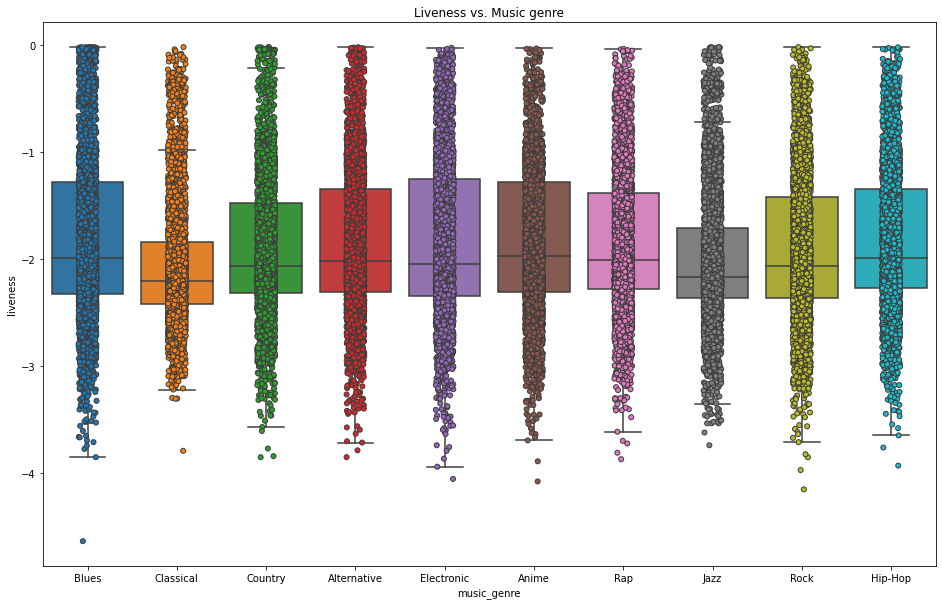

In [588]:
plt.figure(figsize=(16,10))
sns.stripplot(x='music_genre', y='liveness', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='liveness', data=train_total,fliersize=0)
plt.title("Liveness vs. Music genre");

#### Nada destacable en cuanto a que haya alguun genero con diferencias en que se hayan grabado en vivo, todos están en el mismo rango

### 8.H. Loudness

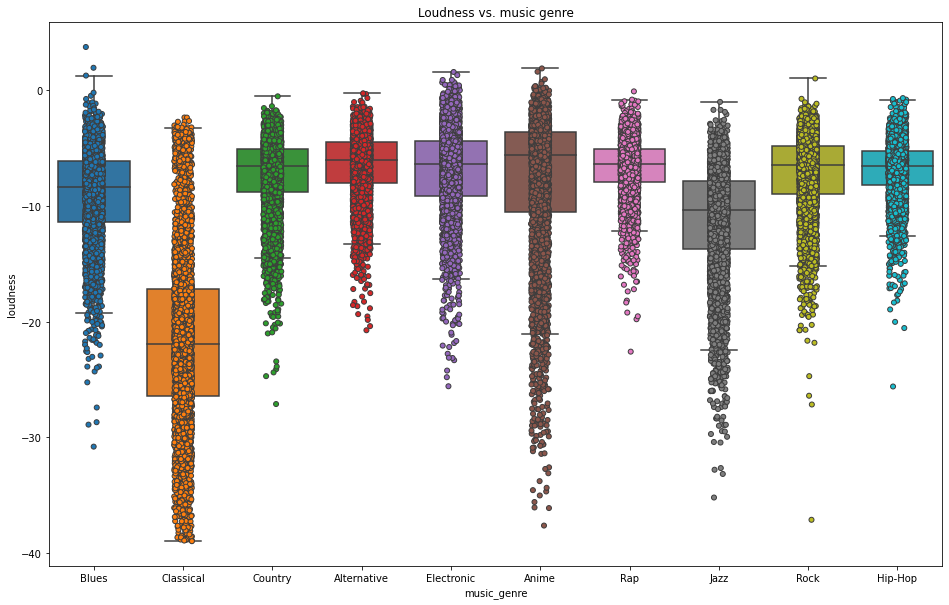

In [589]:
plt.figure(figsize=(16,10))
sns.stripplot(x='music_genre', y='loudness', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='loudness', data=train_total,fliersize=0)
plt.title("Loudness vs. music genre");

#### En cuanto al volumen de las canciones, probablemente en al sgrabaciones se pueda obtener un menor volumen, debido a que su base es instrumental y requiere de distintos musicos tocando en vivo en un lugar, por tanto el volumen puede varias y ser en general menor respecto a  otros generos

### 8.I. Tempo

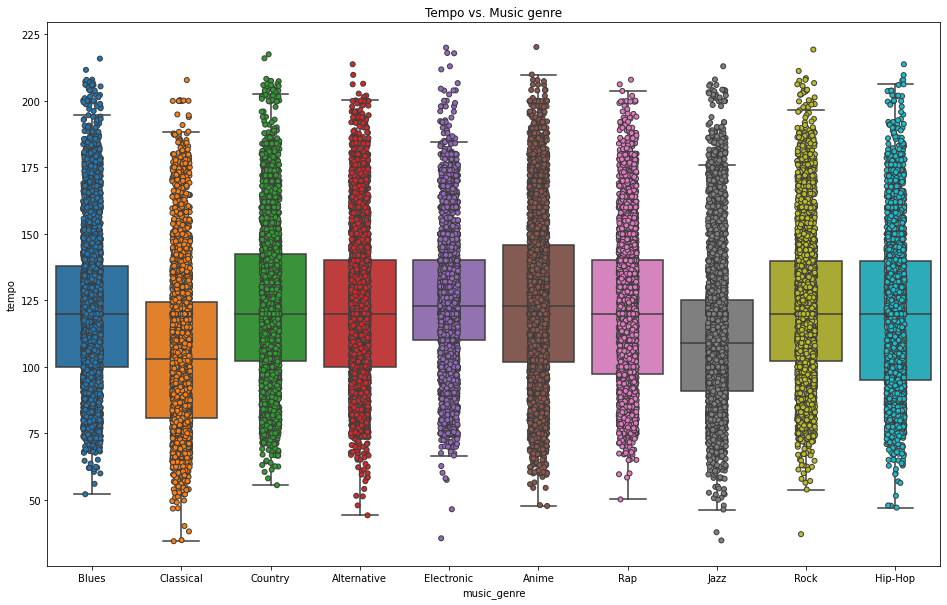

In [590]:
plt.figure(figsize=(16,10))
sns.stripplot(x='music_genre', y='tempo', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='tempo', data=train_total,fliersize=0)
plt.title("Tempo vs. Music genre");

### 8.J. Speechiness

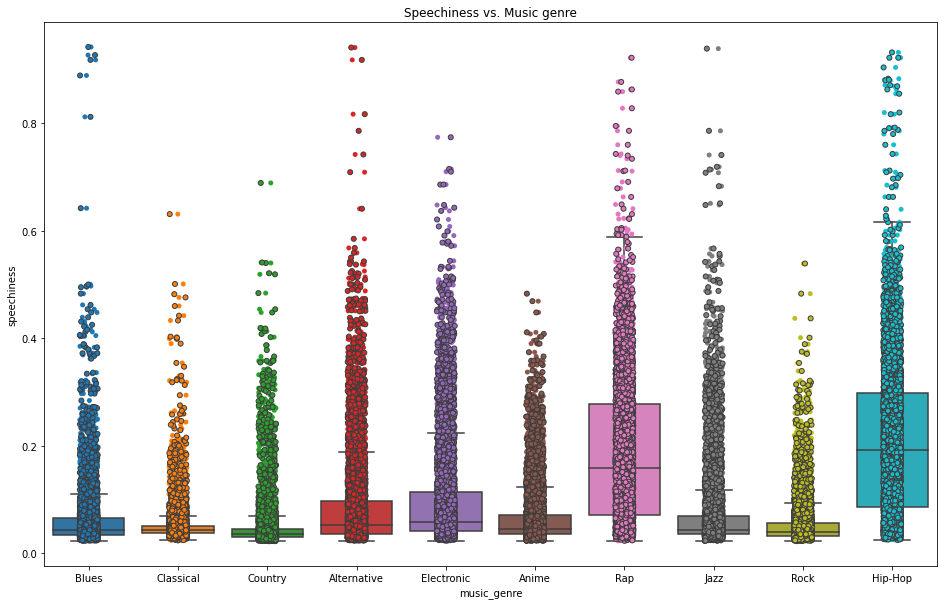

In [591]:
# Gráfico enjambre
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="music_genre", y="speechiness", data=train_total)
sns.stripplot(x='music_genre', y='speechiness', data=train_total, jitter=True, dodge=True, linewidth=1,edgecolor='gray')
ax = sns.boxplot(x='music_genre', y='speechiness', data=train_total,fliersize=0)
plt.title("Speechiness vs. Music genre");

#### **Rap y Hip-hop** tienen una forma muy parecida de nuevo en al variable speechiness, **mayor presencia de palabras habladas en las canciones, y en ambos generos hay una mayor dispersión** respecto al resto de generos

In [592]:
train_total.to_csv('csvs/train_total_modified.csv')

## 8.1. > Guardo CSV X_train modificado

In [593]:
X_train = train_total.drop('music_genre', axis=1)
X_train.head()

popularity  acousticness  danceability  duration_ms  energy  \
30893        26.0      0.148000         0.481     345253.0   0.776   
45278        21.0      0.960000         0.242     480013.0   0.113   
16398        47.0      0.328000         0.798     219960.0   0.538   
13653        39.0      0.031800         0.573     219019.0   0.743   
13748        58.0      0.000006         0.427     265640.0   0.906   

       instrumentalness  liveness  loudness      mode  speechiness  ...  \
30893         -1.493326 -0.329894    -8.404  1.000000       0.0388  ...   
45278         -0.167240 -2.180367   -21.232  0.179818       0.0349  ...   
16398         -3.868285 -1.703749   -11.412  0.179818       0.0363  ...   
13653         -1.493326 -1.883875    -6.047  1.000000       0.0374  ...   
13748         -0.207082 -1.777857    -3.488  0.179818       0.0472  ...   

       key_FA  key_FA#  key_LA  key_LA#  key_MI  key_RE  key_RE#  key_SI  \
30893       1        0       0        0       0       0        0       0   
45278       0        0       0        0       0       0        1       0   
16398       0        0       0        0       0       0        0       0   
13653       0        0       0        0       0       0        0       0   
13748       0        0       1        0       0       0        0       0   

       key_SOL  key_SOL#  
30893        0         0  
45278        0         0  
16398        1         0  
13653        1         0  
13748        0         0  

[5 rows x 23 columns]

In [594]:
X_train.to_csv('csvs/X_train_modified.csv')

In [595]:
# Compruebo que esta bien guardado, volviendo a traerlo y leerlo
X_train = pd.read_csv('csvs/X_train_modified.csv')
X_train.head(10)


Unnamed: 0  popularity  acousticness  danceability  duration_ms  energy  \
0       30893        26.0      0.148000         0.481     345253.0   0.776   
1       45278        21.0      0.960000         0.242     480013.0   0.113   
2       16398        47.0      0.328000         0.798     219960.0   0.538   
3       13653        39.0      0.031800         0.573     219019.0   0.743   
4       13748        58.0      0.000006         0.427     265640.0   0.906   
5       23965        29.0      0.001180         0.410     225093.0   0.988   
6       45552        30.0      0.004140         0.624     251000.0   0.605   
7       30219        28.0      0.001980         0.481     202707.0   0.956   
8       24079        57.0      0.097600         0.921     234787.0   0.480   
9       12181        52.0      0.000690         0.497     230513.0   0.956   

   instrumentalness  liveness  loudness      mode  ...  key_FA  key_FA#  \
0         -1.493326 -0.329894    -8.404  1.000000  ...       1        0   
1         -0.167240 -2.180367   -21.232  0.179818  ...       0        0   
2         -3.868285 -1.703749   -11.412  0.179818  ...       0        0   
3         -1.493326 -1.883875    -6.047  1.000000  ...       0        0   
4         -0.207082 -1.777857    -3.488  0.179818  ...       0        0   
5         -2.062738 -1.164752    -2.381  1.000000  ...       0        0   
6         -4.371529 -2.154165    -7.900  0.179818  ...       0        0   
7         -1.493326 -1.111698    -4.094  0.179818  ...       0        0   
8         -1.493326 -2.566551    -9.200  1.000000  ...       0        0   
9         -5.387271 -1.754464    -4.383  1.000000  ...       0        0   

   key_LA  key_LA#  key_MI  key_RE  key_RE#  key_SI  key_SOL  key_SOL#  
0       0        0       0       0        0       0        0         0  
1       0        0       0       0        1       0        0         0  
2       0        0       0       0        0       0        1         0  
3       0        0       0       0        0       0        1         0  
4       1        0       0       0        0       0        0         0  
5       0        0       0       0        0       1        0         0  
6       0        0       0       0        0       0        0         0  
7       0        0       0       0        0       0        0         0  
8       0        0       0       0        0       0        0         0  
9       0        0       0       0        0       0        1         0  

[10 rows x 24 columns]

In [596]:
X_train.shape

(39719, 24)

In [597]:
X_train.columns

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'valence', 'key_DO#', 'key_FA',
       'key_FA#', 'key_LA', 'key_LA#', 'key_MI', 'key_RE', 'key_RE#', 'key_SI',
       'key_SOL', 'key_SOL#'],
      dtype='object')

In [598]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)

## 9. TRATAMIENTO y_train , MI COLUMNA TARGET

In [599]:
y_train_names = train_total.iloc[:,12]

In [600]:
y_train_names.shape

(39719,)

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


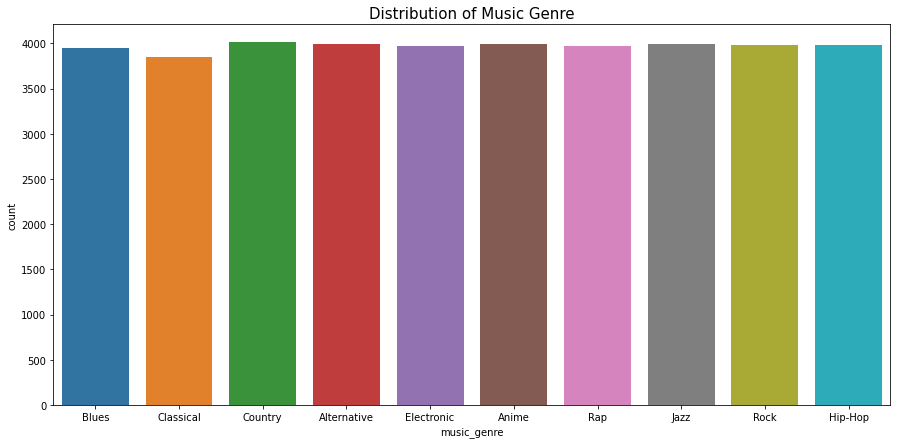

In [601]:
plt.figure(figsize=(15,7))
sns.countplot(y_train_names)
plt.title("Distribution of Music Genre",{'fontsize':15});


In [602]:
generos = y_train_names.value_counts()
generos

Country        4011
Jazz           3999
Alternative    3995
Anime          3989
Rock           3987
Hip-Hop        3984
Rap            3976
Electronic     3975
Blues          3951
Classical      3852
Name: music_genre, dtype: int64

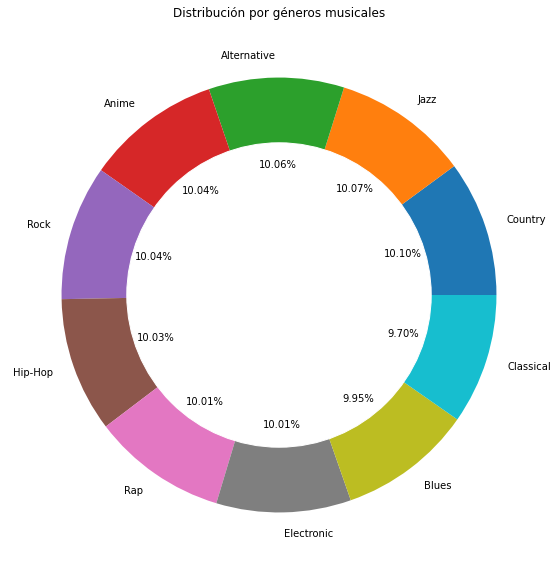

In [603]:
# Visualizo en un roscón que los generos está bien balanceados tras el feature engineering
plt.figure(figsize=(10,10))
plt.pie(generos.values,
        labels = generos.index,
        autopct='%1.2f%%')
        
my_circle=plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf() # figura
p.gca().add_artist(my_circle) # axes de la figura
plt.title('Distribución por géneros musicales');

#### Convierto el TARGET a columna numérica con LabelEncoder

In [604]:
y_train_names.value_counts()

Country        4011
Jazz           3999
Alternative    3995
Anime          3989
Rock           3987
Hip-Hop        3984
Rap            3976
Electronic     3975
Blues          3951
Classical      3852
Name: music_genre, dtype: int64

In [605]:
y_train = le.fit_transform(y_train_names)

In [606]:
y_train = pd.Series(y_train, name= 'music_genre')
y_train.value_counts()

4    4011
7    3999
0    3995
1    3989
9    3987
6    3984
8    3976
5    3975
2    3951
3    3852
Name: music_genre, dtype: int64

In [607]:
generos_musicales = {'Alternative': 0, 'Anime': 1, 'Blues': 2, 'Classical': 3, 'Country': 4, 'Electronic': 5, 'Hip-Hop': 6, 'Jazz': 7, 'Rap': 8, 'Rock': 9}


## 9.1. > Guardo CSV de y_train modificado

In [608]:
y_train.to_csv("csvs/y_train_transformed.csv", index = False)

In [609]:
y_train = pd.read_csv('csvs/y_train_transformed.csv')
y_train.head(10)

music_genre
0            2
1            3
2            2
3            4
4            0
5            2
6            5
7            1
8            0
9            0

In [610]:
#y_test.drop(columns=['Unnamed: 0'], inplace=True)

## 10. ESTANDARIZACIÓN X_train

In [611]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)

In [612]:
X_train_scal = pd.DataFrame(X_train_scal,
                       index=X_train.index,
                       columns=X_train.columns)

X_train_scal.head(5)

popularity  acousticness  danceability  duration_ms    energy  \
0   -1.181905     -0.460124     -0.443239     1.288685  0.659647   
1   -1.504704      1.925870     -1.789203     2.919348 -1.853332   
2    0.173848      0.068791      1.341994    -0.227422 -0.242448   
3   -0.342630     -0.801568      0.074873    -0.238809  0.534566   
4    0.884005     -0.894991     -0.747348     0.325328  1.152388   

   instrumentalness  liveness  loudness      mode  speechiness  ...    key_FA  \
0          0.525620  2.361115  0.109311  1.342698    -0.541965  ...  3.252154   
1          1.271448 -0.442565 -2.003693 -0.744769    -0.580440  ... -0.307488   
2         -0.810123  0.279567 -0.386161 -0.744769    -0.566629  ... -0.307488   
3          0.525620  0.006656  0.497551  1.342698    -0.555777  ... -0.307488   
4          1.249039  0.167285  0.919065 -0.744769    -0.459096  ... -0.307488   

    key_FA#    key_LA   key_LA#    key_MI    key_RE   key_RE#    key_SI  \
0 -0.258507 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891   
1 -0.258507 -0.326158 -0.267805 -0.283509 -0.341944  5.568271 -0.287891   
2 -0.258507 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891   
3 -0.258507 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891   
4 -0.258507  3.066002 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891   

    key_SOL  key_SOL#  
0 -0.360134 -0.266344  
1 -0.360134 -0.266344  
2  2.776744 -0.266344  
3  2.776744 -0.266344  
4 -0.360134 -0.266344  

[5 rows x 23 columns]

In [613]:
X_train_scal.describe().T

count          mean       std       min       25%  \
popularity        39719.0 -2.250466e-16  1.000013 -2.848848 -0.665428   
acousticness      39719.0 -8.246940e-17  1.000013 -0.895007 -0.837123   
danceability      39719.0  4.168193e-17  1.000013 -2.810221 -0.651610   
duration_ms       39719.0  1.177112e-16  1.000013 -2.701381 -0.536070   
energy            39719.0  3.148506e-17  1.000013 -2.278624 -0.632851   
instrumentalness  39719.0  2.148498e-16  1.000013 -1.683272 -1.042375   
liveness          39719.0  3.363177e-16  1.000013 -4.167262 -0.677015   
loudness          39719.0 -1.604665e-16  1.000013 -4.926122 -0.282801   
mode              39719.0  1.016109e-16  1.000013 -0.744769 -0.744769   
speechiness       39719.0  1.279081e-17  1.000013 -0.704744 -0.568602   
tempo             39719.0 -5.475896e-16  1.000013 -2.949792 -0.794841   
valence           39719.0 -2.751365e-16  1.000013 -1.760602 -0.802807   
key_DO#           39719.0 -4.382864e-18  1.000013 -0.349611 -0.349611   
key_FA            39719.0  5.814003e-17  1.000013 -0.307488 -0.307488   
key_FA#           39719.0  3.577848e-19  1.000013 -0.258507 -0.258507   
key_LA            39719.0 -2.924891e-17  1.000013 -0.326158 -0.326158   
key_LA#           39719.0 -4.686981e-17  1.000013 -0.267805 -0.267805   
key_MI            39719.0 -2.576051e-17  1.000013 -0.283509 -0.283509   
key_RE            39719.0  2.898057e-17  1.000013 -0.341944 -0.341944   
key_RE#           39719.0  3.041171e-17  1.000013 -0.179589 -0.179589   
key_SI            39719.0  2.683386e-17  1.000013 -0.287891 -0.287891   
key_SOL           39719.0 -3.577848e-19  1.000013 -0.360134 -0.360134   
key_SOL#          39719.0  2.182487e-17  1.000013 -0.266344 -0.266344   

                       50%       75%       max  
popularity        0.044729  0.754885  3.530952  
acousticness     -0.477755  0.718181  2.031653  
danceability      0.057978  0.722513  2.400744  
duration_ms      -0.238809  0.344489  6.589998  
energy            0.166906  0.818840  1.504887  
instrumentalness  0.525620  0.525620  1.356449  
liveness         -0.277578  0.717519  2.830333  
loudness          0.301701  0.643162  2.110306  
mode             -0.744769  1.342698  1.342698  
speechiness      -0.441339  0.051929  8.368426  
tempo            -0.004359  0.677875  3.455766  
valence          -0.035433  0.776602  2.169242  
key_DO#          -0.349611 -0.349611  2.860325  
key_FA           -0.307488 -0.307488  3.252154  
key_FA#          -0.258507 -0.258507  3.868362  
key_LA           -0.326158 -0.326158  3.066002  
key_LA#          -0.267805 -0.267805  3.734058  
key_MI           -0.283509 -0.283509  3.527221  
key_RE           -0.341944 -0.341944  2.924454  
key_RE#          -0.179589 -0.179589  5.568271  
key_SI           -0.287891 -0.287891  3.473537  
key_SOL          -0.360134 -0.360134  2.776744  
key_SOL#         -0.266344 -0.266344  3.754536

In [614]:
print(X_train.shape)
print(X_train_scal.shape)
print(y_train.shape)

(39719, 23)
(39719, 23)
(39719, 1)


In [615]:
X_train_scal.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'key_DO#', 'key_FA', 'key_FA#', 'key_LA', 'key_LA#',
       'key_MI', 'key_RE', 'key_RE#', 'key_SI', 'key_SOL', 'key_SOL#'],
      dtype='object')

## 11. Visualización features X_train estandarizadas

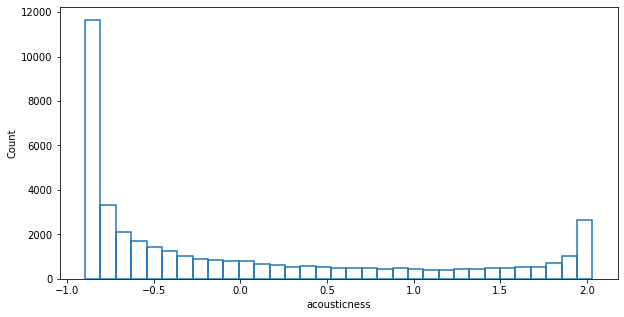

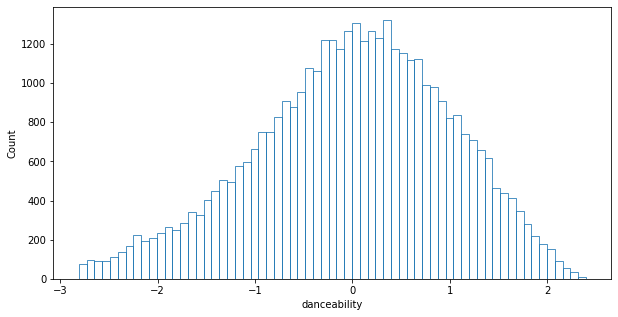

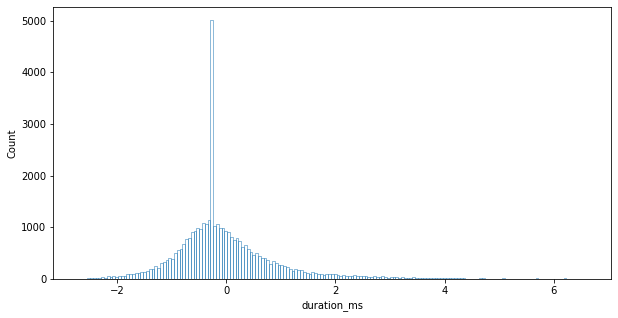

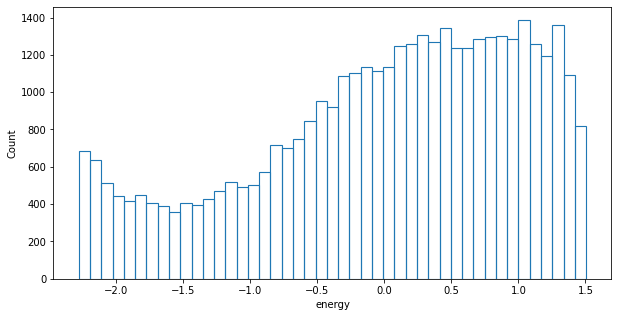

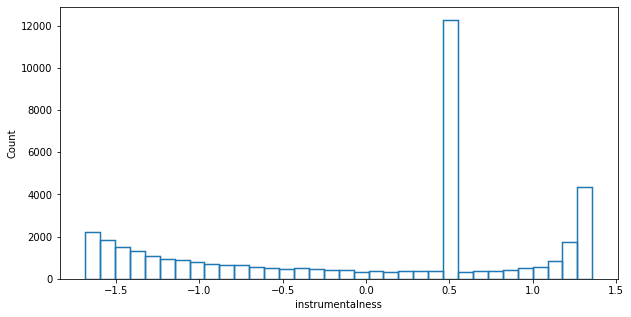

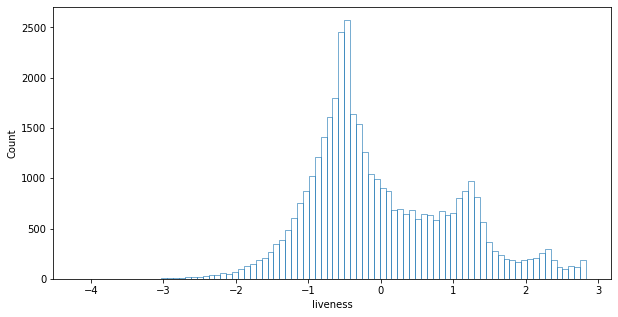

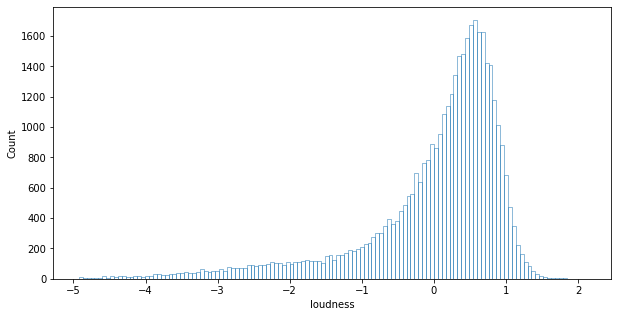

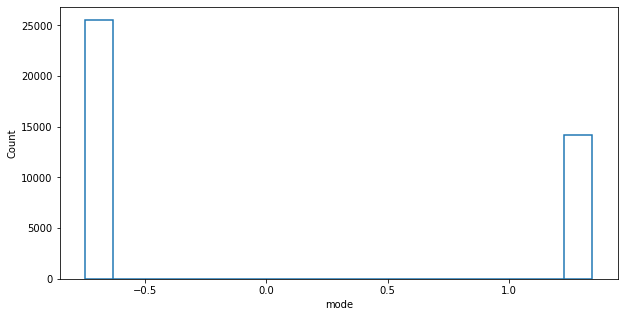

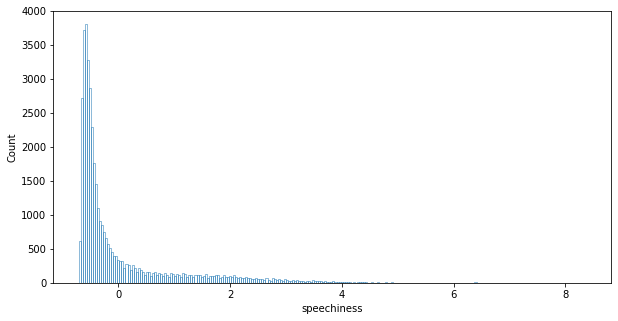

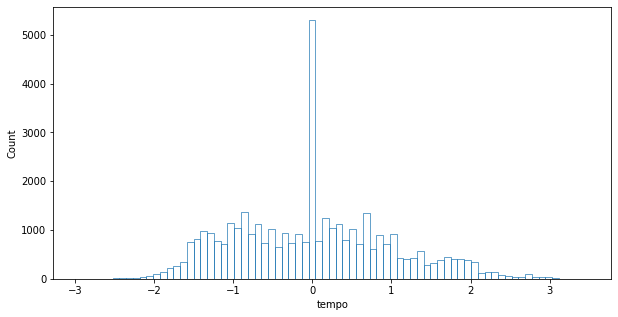

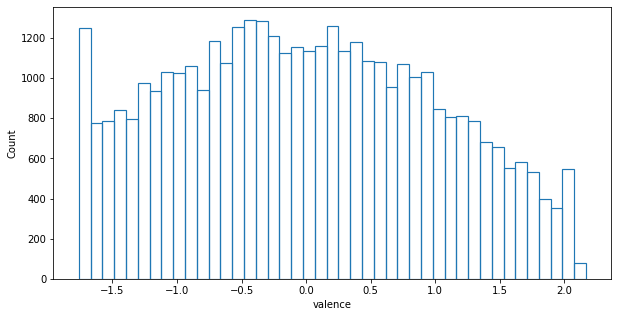

In [616]:
# Quiero ver graficamente sus distribuciones
for column in X_train_scal.columns[1:-11]:
    plt.figure(figsize=[10,5])
    sns.histplot(X_train_scal[column], fill=False)


In [617]:
train_total_scal = pd.concat([X_train_scal, y_train], axis=1)
train_total_scal.head()

popularity  acousticness  danceability  duration_ms    energy  \
0   -1.181905     -0.460124     -0.443239     1.288685  0.659647   
1   -1.504704      1.925870     -1.789203     2.919348 -1.853332   
2    0.173848      0.068791      1.341994    -0.227422 -0.242448   
3   -0.342630     -0.801568      0.074873    -0.238809  0.534566   
4    0.884005     -0.894991     -0.747348     0.325328  1.152388   

   instrumentalness  liveness  loudness      mode  speechiness  ...   key_FA#  \
0          0.525620  2.361115  0.109311  1.342698    -0.541965  ... -0.258507   
1          1.271448 -0.442565 -2.003693 -0.744769    -0.580440  ... -0.258507   
2         -0.810123  0.279567 -0.386161 -0.744769    -0.566629  ... -0.258507   
3          0.525620  0.006656  0.497551  1.342698    -0.555777  ... -0.258507   
4          1.249039  0.167285  0.919065 -0.744769    -0.459096  ... -0.258507   

     key_LA   key_LA#    key_MI    key_RE   key_RE#    key_SI   key_SOL  \
0 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
1 -0.326158 -0.267805 -0.283509 -0.341944  5.568271 -0.287891 -0.360134   
2 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891  2.776744   
3 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891  2.776744   
4  3.066002 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   

   key_SOL#  music_genre  
0 -0.266344            2  
1 -0.266344            3  
2 -0.266344            2  
3 -0.266344            4  
4 -0.266344            0  

[5 rows x 24 columns]

In [618]:
train_scal_total_nokeys = train_total_scal.iloc[:,0:-12]
train_scal_total_nokeys

popularity  acousticness  danceability  duration_ms    energy  \
0       -1.181905     -0.460124     -0.443239     1.288685  0.659647   
1       -1.504704      1.925870     -1.789203     2.919348 -1.853332   
2        0.173848      0.068791      1.341994    -0.227422 -0.242448   
3       -0.342630     -0.801568      0.074873    -0.238809  0.534566   
4        0.884005     -0.894991     -0.747348     0.325328  1.152388   
...           ...           ...           ...          ...       ...   
39714   -0.084391      1.837718     -1.073984     5.454487 -2.106904   
39715   -0.019831     -0.847701      0.694354    -0.686757  0.295776   
39716   -0.148950     -0.881405     -1.451304     1.898550  1.201662   
39717   -0.278070     -0.894449     -1.766677     2.474703  1.281258   
39718   -0.471749     -0.825369      0.322666    -0.333423  0.447389   

       instrumentalness  liveness  loudness      mode  speechiness     tempo  \
0              0.525620  2.361115  0.109311  1.342698    -0.541965 -0.746923   
1              1.271448 -0.442565 -2.003693 -0.744769    -0.580440 -1.373654   
2             -0.810123  0.279567 -0.386161 -0.744769    -0.566629 -1.345041   
3              0.525620  0.006656  0.497551  1.342698    -0.555777  0.754407   
4              1.249039  0.167285  0.919065 -0.744769    -0.459096  0.478962   
...                 ...       ...       ...       ...          ...       ...   
39714         -1.139371 -2.004704 -2.404452 -0.744769    -0.419635  0.538946   
39715          0.525620  1.129826  0.528189  1.342698    -0.553804  0.861965   
39716         -1.553246 -0.253717  0.716297 -0.744769     0.880619  1.824126   
39717          0.391966 -0.044022  0.571510  1.342698     0.722774 -0.891712   
39718          0.966368 -0.891904  0.286053  1.342698    -0.582413 -0.691075   

        valence  
0     -0.348067  
1     -1.383412  
2      0.890287  
3      0.602014  
4      0.329982  
...         ...  
39714 -1.706196  
39715  0.403066  
39716  0.167575  
39717 -0.449571  
39718 -1.564090  

[39719 rows x 12 columns]

In [619]:
train_total_clean = pd.concat([train_scal_total_nokeys, y_train], axis=1)
train_total_clean

popularity  acousticness  danceability  duration_ms    energy  \
0       -1.181905     -0.460124     -0.443239     1.288685  0.659647   
1       -1.504704      1.925870     -1.789203     2.919348 -1.853332   
2        0.173848      0.068791      1.341994    -0.227422 -0.242448   
3       -0.342630     -0.801568      0.074873    -0.238809  0.534566   
4        0.884005     -0.894991     -0.747348     0.325328  1.152388   
...           ...           ...           ...          ...       ...   
39714   -0.084391      1.837718     -1.073984     5.454487 -2.106904   
39715   -0.019831     -0.847701      0.694354    -0.686757  0.295776   
39716   -0.148950     -0.881405     -1.451304     1.898550  1.201662   
39717   -0.278070     -0.894449     -1.766677     2.474703  1.281258   
39718   -0.471749     -0.825369      0.322666    -0.333423  0.447389   

       instrumentalness  liveness  loudness      mode  speechiness     tempo  \
0              0.525620  2.361115  0.109311  1.342698    -0.541965 -0.746923   
1              1.271448 -0.442565 -2.003693 -0.744769    -0.580440 -1.373654   
2             -0.810123  0.279567 -0.386161 -0.744769    -0.566629 -1.345041   
3              0.525620  0.006656  0.497551  1.342698    -0.555777  0.754407   
4              1.249039  0.167285  0.919065 -0.744769    -0.459096  0.478962   
...                 ...       ...       ...       ...          ...       ...   
39714         -1.139371 -2.004704 -2.404452 -0.744769    -0.419635  0.538946   
39715          0.525620  1.129826  0.528189  1.342698    -0.553804  0.861965   
39716         -1.553246 -0.253717  0.716297 -0.744769     0.880619  1.824126   
39717          0.391966 -0.044022  0.571510  1.342698     0.722774 -0.891712   
39718          0.966368 -0.891904  0.286053  1.342698    -0.582413 -0.691075   

        valence  music_genre  
0     -0.348067            2  
1     -1.383412            3  
2      0.890287            2  
3      0.602014            4  
4      0.329982            0  
...         ...          ...  
39714 -1.706196            3  
39715  0.403066            5  
39716  0.167575            0  
39717 -0.449571            7  
39718 -1.564090            5  

[39719 rows x 13 columns]

### Hago mapa de calor para ver la relación de las Features con el TARGET

interval columns not set, guessing: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'music_genre']


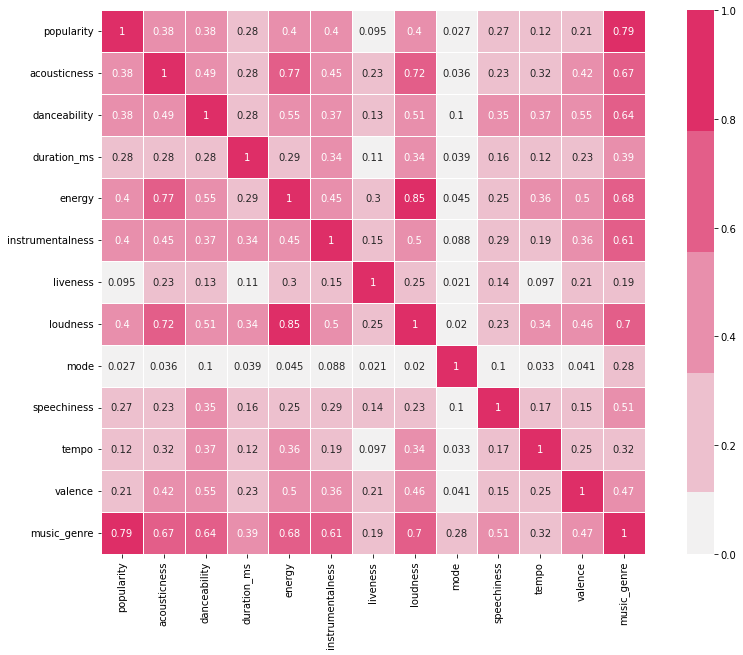

In [620]:
import phik
phik_matrix = train_total_clean.phik_matrix()

plt.figure(figsize=(15,10))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(20, 0, s=85, n=9),
            square=True,
            annot=True,
            linewidths=.5);

## 11.1. > Guardo X_train modificado y estandarizado


In [621]:
X_train_scal.to_csv("csvs/X_train_modified_and_scaled.csv")

In [622]:
X_train_scal = pd.read_csv('csvs/X_train_modified_and_scaled.csv')
X_train_scal.head(10)

Unnamed: 0  popularity  acousticness  danceability  duration_ms    energy  \
0           0   -1.181905     -0.460124     -0.443239     1.288685  0.659647   
1           1   -1.504704      1.925870     -1.789203     2.919348 -1.853332   
2           2    0.173848      0.068791      1.341994    -0.227422 -0.242448   
3           3   -0.342630     -0.801568      0.074873    -0.238809  0.534566   
4           4    0.884005     -0.894991     -0.747348     0.325328  1.152388   
5           5   -0.988226     -0.891543     -0.843086    -0.165311  1.463193   
6           6   -0.923667     -0.882845      0.362087     0.148177  0.011503   
7           7   -1.052786     -0.889192     -0.443239    -0.436192  1.341903   
8           8    0.819445     -0.608220      2.034687    -0.048008 -0.462287   
9           9    0.496646     -0.892982     -0.353132    -0.099726  1.341903   

   instrumentalness  liveness  loudness      mode  ...    key_FA   key_FA#  \
0          0.525620  2.361115  0.109311  1.342698  ...  3.252154 -0.258507   
1          1.271448 -0.442565 -2.003693 -0.744769  ... -0.307488 -0.258507   
2         -0.810123  0.279567 -0.386161 -0.744769  ... -0.307488 -0.258507   
3          0.525620  0.006656  0.497551  1.342698  ... -0.307488 -0.258507   
4          1.249039  0.167285  0.919065 -0.744769  ... -0.307488 -0.258507   
5          0.205367  1.096209  1.101408  1.342698  ... -0.307488 -0.258507   
6         -1.093161 -0.402865  0.192329 -0.744769  ... -0.307488 -0.258507   
7          0.525620  1.176593  0.819246 -0.744769  ... -0.307488 -0.258507   
8          0.525620 -1.027677 -0.021805  1.342698  ... -0.307488 -0.258507   
9         -1.664443  0.202728  0.771642  1.342698  ... -0.307488 -0.258507   

     key_LA   key_LA#    key_MI    key_RE   key_RE#    key_SI   key_SOL  \
0 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
1 -0.326158 -0.267805 -0.283509 -0.341944  5.568271 -0.287891 -0.360134   
2 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891  2.776744   
3 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891  2.776744   
4  3.066002 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
5 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589  3.473537 -0.360134   
6 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
7 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
8 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
9 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891  2.776744   

   key_SOL#  
0 -0.266344  
1 -0.266344  
2 -0.266344  
3 -0.266344  
4 -0.266344  
5 -0.266344  
6 -0.266344  
7 -0.266344  
8 -0.266344  
9 -0.266344  

[10 rows x 24 columns]

In [623]:
X_train_scal.drop(columns=['Unnamed: 0'], inplace=True)

In [624]:
train_total_scal.to_csv("csvs/train_total_scaled.csv")


## --->> MILESTONE: Train ya está tratado y preparado para aplicarle modelos

Los modelos se desarrollan en otro notebook, PARTE II.

Sin embargo, a continuación hago el tratamiento de mis datos de TEST para tenerlos preparados y en los modelos poder comparar resultados obtenidos en TRAIN con los datos de TEST.

## 12. DATA CLEANING & FEATURE ENGINEERING: sobre TEST (igual que tratamiento en train)

In [625]:
test_total = pd.concat([X_test, y_test], axis=1)
test_total

artist_name  popularity  acousticness  danceability  \
33553           Scott Hamilton        60.0       0.91500         0.487   
9427   Queens of the Stone Age        33.0       0.01690         0.483   
199            Makaya McCraven        36.0       0.63800         0.396   
12447       The Rolling Stones        63.0       0.83400         0.518   
39489              Kodak Black        72.0       0.09960         0.715   
...                        ...         ...           ...           ...   
28567           Dillon Francis        33.0       0.13200         0.819   
25079          Jameson Rodgers        41.0       0.10600         0.550   
18707             Marty Stuart        37.0       0.00437         0.644   
15200          Antonio Vivaldi        30.0       0.76700         0.464   
5857                  Lil Durk        68.0       0.02850         0.766   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
33553         -1.0   0.135          0.003530   D     0.686   -11.211  Minor   
9427      158067.0   0.903          0.053400   C     0.115    -5.767  Minor   
199       314800.0   0.380          0.836000   E     0.111   -12.908  Minor   
12447     196493.0   0.543          0.000000   C     0.200   -10.766  Major   
39489     130929.0   0.617          0.000003   B     0.186    -5.558  Minor   
...            ...     ...               ...  ..       ...       ...    ...   
28567      68574.0   0.930          0.003020  C#     0.133    -2.151  Major   
25079         -1.0   0.832          0.000000  C#     0.102    -5.089  Major   
18707     193173.0   0.644          0.000037   F     0.178   -10.298  Major   
15200     133681.0   0.312          0.005100   C     0.313   -19.499  Major   
5857      144661.0   0.478          0.000000  A#     0.170    -8.287  Major   

       speechiness               tempo  valence music_genre  
33553       0.0434             105.854    0.240        Jazz  
9427        0.0738             159.775    0.737       Blues  
199         0.0429             150.013    0.618        Jazz  
12447       0.0297  104.52799999999999    0.579        Rock  
39489       0.2400  176.11700000000002    0.283     Hip-Hop  
...            ...                 ...      ...         ...  
28567       0.2140             112.036    0.747  Electronic  
25079       0.0355             102.012    0.469     Country  
18707       0.0321             133.648    0.591     Country  
15200       0.0356  119.62200000000001    0.701   Classical  
5857        0.4790   99.85700000000001    0.303     Hip-Hop  

[10000 rows x 15 columns]

### 12.A. COLUMNA ' DURATION_MS'

In [626]:
# Observo si hay duraciones negativas
test_total[(test_total['duration_ms'] < 0)]

artist_name  popularity  acousticness  danceability  \
33553        Scott Hamilton        60.0        0.9150         0.487   
12144       Modern Baseball        41.0        0.0227         0.626   
42111           Pascal Rogé        39.0        0.9950         0.469   
49717          BROWN & GRAY        58.0        0.0266         0.633   
46734                 Cults        49.0        0.1150         0.374   
...                     ...         ...           ...           ...   
48482          Carly Pearce        38.0        0.0813         0.612   
35047           Graham Nash        57.0        0.7320         0.480   
29598       Frédéric Chopin        29.0        0.9940         0.358   
37692  Kenny Wayne Shepherd        28.0        0.0030         0.431   
25079       Jameson Rodgers        41.0        0.1060         0.550   

       duration_ms   energy  instrumentalness key  liveness  loudness   mode  \
33553         -1.0  0.13500          0.003530   D    0.6860   -11.211  Minor   
12144         -1.0  0.61900          0.000024   B    0.1850    -7.246  Major   
42111         -1.0  0.00245          0.927000   G    0.0603   -38.198  Major   
49717         -1.0  0.78200          0.000000   D    0.1390    -4.311  Major   
46734         -1.0  0.69700          0.893000   D    0.3430    -6.758  Major   
...            ...      ...               ...  ..       ...       ...    ...   
48482         -1.0  0.91700          0.000045  C#    0.3590    -4.058  Minor   
35047         -1.0  0.29800          0.002950  F#    0.1000   -13.477  Major   
29598         -1.0  0.20500          0.000014   E    0.1490   -13.588  Minor   
37692         -1.0  0.82500          0.010900   D    0.2190    -5.486  Minor   
25079         -1.0  0.83200          0.000000  C#    0.1020    -5.089  Major   

       speechiness               tempo  valence  music_genre  
33553       0.0434             105.854   0.2400         Jazz  
12144       0.0263             120.045   0.2510  Alternative  
42111       0.0507               67.46   0.2020    Classical  
49717       0.0345             127.991   0.5420      Country  
46734       0.0331   77.54899999999999   0.4930  Alternative  
...            ...                 ...      ...          ...  
48482       0.0992  133.02200000000002   0.4700      Country  
35047       0.0356  128.02200000000002   0.0556         Rock  
29598       0.0552   97.34700000000001   0.0393    Classical  
37692       0.0322             140.041   0.3180        Blues  
25079       0.0355             102.012   0.4690      Country  

[990 rows x 15 columns]

In [627]:
# Sustituyo las duraciones de -1, que no son posibles, por la mediana de duracion en TRAIN
test_total['duration_ms'] = test_total['duration_ms'].replace(-1, mediana)

test_total['duration_ms']

33553    219019.0
9427     158067.0
199      314800.0
12447    196493.0
39489    130929.0
           ...   
28567     68574.0
25079    219019.0
18707    193173.0
15200    133681.0
5857     144661.0
Name: duration_ms, Length: 10000, dtype: float64

In [628]:
# Que registros duran más de 16min
test_total[test_total['duration_ms'] >= mili_cortesuperior]

artist_name  popularity  acousticness  danceability  \
28075               empty_field        28.0      0.983000        0.2960   
21069          Aaron Jay Kernis         0.0      0.986000        0.2120   
6748             Anton Bruckner        29.0      0.964000        0.0883   
40639    Ralph Vaughan Williams        30.0      0.884000        0.1040   
7270            Johannes Brahms         0.0      0.832000        0.2130   
17004      Ludwig van Beethoven        40.0      0.979000        0.3530   
20330               empty_field        48.0      0.975000        0.3030   
853                       Haken        38.0      0.000991        0.3090   
27719      Ludwig van Beethoven        27.0      0.977000        0.3340   
30558      Ludwig van Beethoven        37.0      0.982000        0.2970   
15970         Leonard Bernstein         0.0      0.881000        0.2000   
19635      Ludwig van Beethoven        50.0      0.951000        0.2470   
49767             Gustav Mahler        12.0      0.925000        0.2630   
15978      Ludwig van Beethoven        37.0      0.826000        0.1560   
657                         Yes        45.0      0.265000        0.2220   
18246  The Allman Brothers Band        32.0      0.597000        0.3960   
34913           Johannes Brahms        21.0      0.949000        0.1650   
44809                  Autechre        37.0      0.629000        0.5730   
6178            Johannes Brahms         0.0      0.952000        0.1550   
47847      Ludwig van Beethoven        25.0      0.960000        0.2590   
40728               Miles Davis        33.0      0.249000        0.5340   
2331                empty_field        31.0      0.006920        0.2340   
25050  The Allman Brothers Band        33.0      0.123000        0.3320   
10508            Richard Wagner        58.0      0.831000        0.0843   
38579          Gregorio Allegri        34.0      0.988000        0.0648   
9444           Benjamin Britten        25.0      0.860000        0.2510   
35166               Blind Faith        26.0      0.103000        0.4090   
35807             Nobuo Uematsu        33.0      0.295000        0.2740   
30401             Gustav Mahler         6.0      0.949000        0.2760   
46075            Richard Wagner        46.0      0.936000        0.1200   
24120             Nobuo Uematsu        16.0      0.117000        0.1910   
12117               Sultan Khan        26.0      0.819000        0.2710   
7062             Hector Berlioz        25.0      0.649000        0.2010   
19489            Franz Schubert        42.0      0.941000        0.1060   
28735               Miles Davis        34.0      0.687000        0.5280   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
28075     839758.0  0.0226            0.7370   D    0.0973   -27.482  Major   
21069    1108495.0  0.0343            0.7590   B    0.0873   -21.815  Minor   
6748     1070467.0  0.0158            0.6370  G#    0.0523   -24.158  Major   
40639     875933.0  0.0377            0.5140   E    0.0672   -27.886  Minor   
7270     1350400.0  0.0798            0.0269   D    0.0613   -23.056  Major   
17004    1265280.0  0.0859            0.9210  D#    0.0820   -20.976  Major   
20330     820853.0  0.1190            0.8800   A    0.1120   -18.055  Minor   
853       940120.0  0.9050            0.0394   B    0.0872    -6.447  Minor   
27719     900480.0  0.0430            0.9190  A#    0.3310   -28.687  Major   
30558    1001787.0  0.1410            0.9080  A#    0.0657   -16.903  Major   
15970    1008440.0  0.1260            0.3530  C#    0.6230   -20.132  Major   
19635     962067.0  0.0677            0.7750  D#    0.2880   -19.563  Major   
49767    1935787.0  0.1440            0.6920   F    0.0685   -17.352  Major   
15978    1030760.0  0.0167            0.5230   C    0.0683   -30.196  Major   
657      1121253.0  0.5970            0.1550   F    0.4110   -10.924  Major   
18246    1159913.0  0.7100            0.6260   D    0.3

In [629]:
# Me quedo con test sin outliers de duracion
test_total = test_total[test_total['duration_ms'] < mili_cortesuperior]
test_total

artist_name  popularity  acousticness  danceability  \
33553           Scott Hamilton        60.0       0.91500         0.487   
9427   Queens of the Stone Age        33.0       0.01690         0.483   
199            Makaya McCraven        36.0       0.63800         0.396   
12447       The Rolling Stones        63.0       0.83400         0.518   
39489              Kodak Black        72.0       0.09960         0.715   
...                        ...         ...           ...           ...   
28567           Dillon Francis        33.0       0.13200         0.819   
25079          Jameson Rodgers        41.0       0.10600         0.550   
18707             Marty Stuart        37.0       0.00437         0.644   
15200          Antonio Vivaldi        30.0       0.76700         0.464   
5857                  Lil Durk        68.0       0.02850         0.766   

       duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
33553     219019.0   0.135          0.003530   D     0.686   -11.211  Minor   
9427      158067.0   0.903          0.053400   C     0.115    -5.767  Minor   
199       314800.0   0.380          0.836000   E     0.111   -12.908  Minor   
12447     196493.0   0.543          0.000000   C     0.200   -10.766  Major   
39489     130929.0   0.617          0.000003   B     0.186    -5.558  Minor   
...            ...     ...               ...  ..       ...       ...    ...   
28567      68574.0   0.930          0.003020  C#     0.133    -2.151  Major   
25079     219019.0   0.832          0.000000  C#     0.102    -5.089  Major   
18707     193173.0   0.644          0.000037   F     0.178   -10.298  Major   
15200     133681.0   0.312          0.005100   C     0.313   -19.499  Major   
5857      144661.0   0.478          0.000000  A#     0.170    -8.287  Major   

       speechiness               tempo  valence music_genre  
33553       0.0434             105.854    0.240        Jazz  
9427        0.0738             159.775    0.737       Blues  
199         0.0429             150.013    0.618        Jazz  
12447       0.0297  104.52799999999999    0.579        Rock  
39489       0.2400  176.11700000000002    0.283     Hip-Hop  
...            ...                 ...      ...         ...  
28567       0.2140             112.036    0.747  Electronic  
25079       0.0355             102.012    0.469     Country  
18707       0.0321             133.648    0.591     Country  
15200       0.0356  119.62200000000001    0.701   Classical  
5857        0.4790   99.85700000000001    0.303     Hip-Hop  

[9965 rows x 15 columns]

### 12.B. COLUMNA 'MODE'

In [630]:
# Aplico Label Encoder también a a columna 'mode' en TEST
test_total['mode'] = le.fit_transform(test_total['mode'])

test_total['mode'].value_counts()


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    6339
1    3626
Name: mode, dtype: int64

### 12.C. COLUMNA 'INSTRUMENTALNESS'

In [631]:
test_total['instrumentalness'].value_counts()

0.000000    3072
0.915000      18
0.923000      17
0.895000      16
0.874000      16
            ... 
0.012800       1
0.006630       1
0.000864       1
0.322000       1
0.000155       1
Name: instrumentalness, Length: 3192, dtype: int64

In [632]:
test_total['instrumentalness'] =test_total['instrumentalness'].replace(0.000000, media_instru)
test_total.head()

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


artist_name  popularity  acousticness  danceability  \
33553           Scott Hamilton        60.0        0.9150         0.487   
9427   Queens of the Stone Age        33.0        0.0169         0.483   
199            Makaya McCraven        36.0        0.6380         0.396   
12447       The Rolling Stones        63.0        0.8340         0.518   
39489              Kodak Black        72.0        0.0996         0.715   

       duration_ms  energy  instrumentalness key  liveness  loudness  mode  \
33553     219019.0   0.135          0.003530   D     0.686   -11.211     1   
9427      158067.0   0.903          0.053400   C     0.115    -5.767     1   
199       314800.0   0.380          0.836000   E     0.111   -12.908     1   
12447     196493.0   0.543          0.179818   C     0.200   -10.766     0   
39489     130929.0   0.617          0.000003   B     0.186    -5.558     1   

       speechiness               tempo  valence music_genre  
33553       0.0434             105.854    0.240        Jazz  
9427        0.0738             159.775    0.737       Blues  
199         0.0429             150.013    0.618        Jazz  
12447       0.0297  104.52799999999999    0.579        Rock  
39489       0.2400  176.11700000000002    0.283     Hip-Hop

In [633]:
# Que canciones son outliers en instrumentalness en TEST
test_total[test_total['instrumentalness'] >= ins_cortesuperior]

artist_name  popularity  acousticness  danceability  duration_ms  \
40351     Hector Berlioz         0.0         0.980         0.102      90693.0   
19766  Capcom Sound Team        13.0         0.263         0.563      49067.0   

       energy  instrumentalness key  liveness  loudness  mode  speechiness  \
40351   0.184             0.988   D     0.200   -20.783     0       0.0384   
19766   0.910             0.996  C#     0.227   -13.219     0       0.0760   

                   tempo  valence music_genre  
40351  90.60799999999999    0.399   Classical  
19766             133.98    0.033       Anime

In [634]:
# Me quedo con las canciones que no son outliers en instrumentalness de TEST
test_total_no_out = test_total[test_total['instrumentalness'] < ins_cortesuperior]
test_total_no_out

artist_name  popularity  acousticness  danceability  \
33553           Scott Hamilton        60.0       0.91500         0.487   
9427   Queens of the Stone Age        33.0       0.01690         0.483   
199            Makaya McCraven        36.0       0.63800         0.396   
12447       The Rolling Stones        63.0       0.83400         0.518   
39489              Kodak Black        72.0       0.09960         0.715   
...                        ...         ...           ...           ...   
28567           Dillon Francis        33.0       0.13200         0.819   
25079          Jameson Rodgers        41.0       0.10600         0.550   
18707             Marty Stuart        37.0       0.00437         0.644   
15200          Antonio Vivaldi        30.0       0.76700         0.464   
5857                  Lil Durk        68.0       0.02850         0.766   

       duration_ms  energy  instrumentalness key  liveness  loudness  mode  \
33553     219019.0   0.135          0.003530   D     0.686   -11.211     1   
9427      158067.0   0.903          0.053400   C     0.115    -5.767     1   
199       314800.0   0.380          0.836000   E     0.111   -12.908     1   
12447     196493.0   0.543          0.179818   C     0.200   -10.766     0   
39489     130929.0   0.617          0.000003   B     0.186    -5.558     1   
...            ...     ...               ...  ..       ...       ...   ...   
28567      68574.0   0.930          0.003020  C#     0.133    -2.151     0   
25079     219019.0   0.832          0.179818  C#     0.102    -5.089     0   
18707     193173.0   0.644          0.000037   F     0.178   -10.298     0   
15200     133681.0   0.312          0.005100   C     0.313   -19.499     0   
5857      144661.0   0.478          0.179818  A#     0.170    -8.287     0   

       speechiness               tempo  valence music_genre  
33553       0.0434             105.854    0.240        Jazz  
9427        0.0738             159.775    0.737       Blues  
199         0.0429             150.013    0.618        Jazz  
12447       0.0297  104.52799999999999    0.579        Rock  
39489       0.2400  176.11700000000002    0.283     Hip-Hop  
...            ...                 ...      ...         ...  
28567       0.2140             112.036    0.747  Electronic  
25079       0.0355             102.012    0.469     Country  
18707       0.0321             133.648    0.591     Country  
15200       0.0356  119.62200000000001    0.701   Classical  
5857        0.4790   99.85700000000001    0.303     Hip-Hop  

[9963 rows x 15 columns]

In [635]:
test_total_no_out['instrumentalness']

33553    0.003530
9427     0.053400
199      0.836000
12447    0.179818
39489    0.000003
           ...   
28567    0.003020
25079    0.179818
18707    0.000037
15200    0.005100
5857     0.179818
Name: instrumentalness, Length: 9963, dtype: float64

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


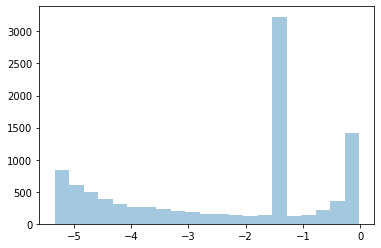

In [636]:
# Aplico transformacion  boxcox
sns.distplot(stats.boxcox(test_total_no_out['instrumentalness'])[0], kde=False);

In [637]:
test_total_no_out['instrumentalness'] = stats.boxcox(test_total_no_out['instrumentalness'])[0]


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [638]:
test_total = test_total_no_out
test_total.head()

artist_name  popularity  acousticness  danceability  \
33553           Scott Hamilton        60.0        0.9150         0.487   
9427   Queens of the Stone Age        33.0        0.0169         0.483   
199            Makaya McCraven        36.0        0.6380         0.396   
12447       The Rolling Stones        63.0        0.8340         0.518   
39489              Kodak Black        72.0        0.0996         0.715   

       duration_ms  energy  instrumentalness key  liveness  loudness  mode  \
33553     219019.0   0.135         -3.636274   D     0.686   -11.211     1   
9427      158067.0   0.903         -2.310026   C     0.115    -5.767     1   
199       314800.0   0.380         -0.176439   E     0.111   -12.908     1   
12447     196493.0   0.543         -1.489131   C     0.200   -10.766     0   
39489     130929.0   0.617         -5.206685   B     0.186    -5.558     1   

       speechiness               tempo  valence music_genre  
33553       0.0434             105.854    0.240        Jazz  
9427        0.0738             159.775    0.737       Blues  
199         0.0429             150.013    0.618        Jazz  
12447       0.0297  104.52799999999999    0.579        Rock  
39489       0.2400  176.11700000000002    0.283     Hip-Hop

In [639]:
test_total.shape

(9963, 15)

### 12.D. COLUMNA LIVENESS

In [640]:
test_total_no_out_live = test_total[test_total['liveness'] < live_cortesuperior]

In [641]:
test_total_no_out_live

artist_name  popularity  acousticness  danceability  \
33553           Scott Hamilton        60.0       0.91500         0.487   
9427   Queens of the Stone Age        33.0       0.01690         0.483   
199            Makaya McCraven        36.0       0.63800         0.396   
12447       The Rolling Stones        63.0       0.83400         0.518   
39489              Kodak Black        72.0       0.09960         0.715   
...                        ...         ...           ...           ...   
28567           Dillon Francis        33.0       0.13200         0.819   
25079          Jameson Rodgers        41.0       0.10600         0.550   
18707             Marty Stuart        37.0       0.00437         0.644   
15200          Antonio Vivaldi        30.0       0.76700         0.464   
5857                  Lil Durk        68.0       0.02850         0.766   

       duration_ms  energy  instrumentalness key  liveness  loudness  mode  \
33553     219019.0   0.135         -3.636274   D     0.686   -11.211     1   
9427      158067.0   0.903         -2.310026   C     0.115    -5.767     1   
199       314800.0   0.380         -0.176439   E     0.111   -12.908     1   
12447     196493.0   0.543         -1.489131   C     0.200   -10.766     0   
39489     130929.0   0.617         -5.206685   B     0.186    -5.558     1   
...            ...     ...               ...  ..       ...       ...   ...   
28567      68574.0   0.930         -3.695494  C#     0.133    -2.151     0   
25079     219019.0   0.832         -1.489131  C#     0.102    -5.089     0   
18707     193173.0   0.644         -4.855502   F     0.178   -10.298     0   
15200     133681.0   0.312         -3.490282   C     0.313   -19.499     0   
5857      144661.0   0.478         -1.489131  A#     0.170    -8.287     0   

       speechiness               tempo  valence music_genre  
33553       0.0434             105.854    0.240        Jazz  
9427        0.0738             159.775    0.737       Blues  
199         0.0429             150.013    0.618        Jazz  
12447       0.0297  104.52799999999999    0.579        Rock  
39489       0.2400  176.11700000000002    0.283     Hip-Hop  
...            ...                 ...      ...         ...  
28567       0.2140             112.036    0.747  Electronic  
25079       0.0355             102.012    0.469     Country  
18707       0.0321             133.648    0.591     Country  
15200       0.0356  119.62200000000001    0.701   Classical  
5857        0.4790   99.85700000000001    0.303     Hip-Hop  

[9956 rows x 15 columns]

In [642]:
test_total_no_out_live.shape

(9956, 15)

In [643]:
test_total_no_out_live['liveness']= np.log(test_total_no_out_live['liveness'])

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [644]:
test_total = test_total_no_out_live
test_total.head()

artist_name  popularity  acousticness  danceability  \
33553           Scott Hamilton        60.0        0.9150         0.487   
9427   Queens of the Stone Age        33.0        0.0169         0.483   
199            Makaya McCraven        36.0        0.6380         0.396   
12447       The Rolling Stones        63.0        0.8340         0.518   
39489              Kodak Black        72.0        0.0996         0.715   

       duration_ms  energy  instrumentalness key  liveness  loudness  mode  \
33553     219019.0   0.135         -3.636274   D -0.376878   -11.211     1   
9427      158067.0   0.903         -2.310026   C -2.162823    -5.767     1   
199       314800.0   0.380         -0.176439   E -2.198225   -12.908     1   
12447     196493.0   0.543         -1.489131   C -1.609438   -10.766     0   
39489     130929.0   0.617         -5.206685   B -1.682009    -5.558     1   

       speechiness               tempo  valence music_genre  
33553       0.0434             105.854    0.240        Jazz  
9427        0.0738             159.775    0.737       Blues  
199         0.0429             150.013    0.618        Jazz  
12447       0.0297  104.52799999999999    0.579        Rock  
39489       0.2400  176.11700000000002    0.283     Hip-Hop

In [645]:
test_total.shape

(9956, 15)

### 12.E. COLUMNA 'KEY'

In [646]:
# Sustituyo notas inglés por notas español
test_total['key'] = test_total['key'].apply(esc_esp)

# Hago get_dummies para separar por columnas, eliminando al primera para evitar colinealidad
test_total = pd.get_dummies(test_total, columns = ['key'], drop_first = True)

test_total.head()

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


artist_name  popularity  acousticness  danceability  \
33553           Scott Hamilton        60.0        0.9150         0.487   
9427   Queens of the Stone Age        33.0        0.0169         0.483   
199            Makaya McCraven        36.0        0.6380         0.396   
12447       The Rolling Stones        63.0        0.8340         0.518   
39489              Kodak Black        72.0        0.0996         0.715   

       duration_ms  energy  instrumentalness  liveness  loudness  mode  ...  \
33553     219019.0   0.135         -3.636274 -0.376878   -11.211     1  ...   
9427      158067.0   0.903         -2.310026 -2.162823    -5.767     1  ...   
199       314800.0   0.380         -0.176439 -2.198225   -12.908     1  ...   
12447     196493.0   0.543         -1.489131 -1.609438   -10.766     0  ...   
39489     130929.0   0.617         -5.206685 -1.682009    -5.558     1  ...   

       key_FA key_FA#  key_LA key_LA#  key_MI  key_RE  key_RE#  key_SI  \
33553       0       0       0       0       0       1        0       0   
9427        0       0       0       0       0       0        0       0   
199         0       0       0       0       1       0        0       0   
12447       0       0       0       0       0       0        0       0   
39489       0       0       0       0       0       0        0       1   

       key_SOL  key_SOL#  
33553        0         0  
9427         0         0  
199          0         0  
12447        0         0  
39489        0         0  

[5 rows x 25 columns]

### 12.F. COLUMNA 'TEMPO'

In [647]:
# localizo caracteres '?' y los sustituyo por valor nuerico no posible, es decir no tenemos el valor dle tempo de estas canciones
test_total['tempo'] = test_total['tempo'].str.replace('?', '-1.5')

# Convierto variable 'tempo' a float
test_total['tempo'] = np.round(test_total['tempo'].astype(float), 2)

# Extraigo las canciones sin tempo que ahora valen -1.5
sin_tempo = test_total[(test_total['tempo']==-1.5)].index
test_total_contempo = test_total.drop(index = sin_tempo)

# A las canciones sin tempo les pongo el tempo obtenido como la mediana que obtuve en TRAIN
test_total['tempo'] = test_total['tempo'].replace(-1.5, mediana_tempo)

test_total['tempo']

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


33553    105.85
9427     159.78
199      150.01
12447    104.53
39489    176.12
          ...  
28567    112.04
25079    102.01
18707    133.65
15200    119.62
5857      99.86
Name: tempo, Length: 9956, dtype: float64

In [648]:
test_total.describe().T

count           mean           std           min  \
popularity        9956.0      44.374749     15.565667      0.000000   
acousticness      9956.0       0.300438      0.337110      0.000001   
danceability      9956.0       0.560900      0.177500      0.059600   
duration_ms       9956.0  240363.525814  83397.020842  22750.000000   
energy            9956.0       0.601194      0.259815      0.000792   
instrumentalness  9956.0      -2.388401      1.742593     -5.338235   
liveness          9956.0      -1.878909      0.665241     -4.297685   
loudness          9956.0      -9.036736      5.988539    -47.046000   
mode              9956.0       0.364102      0.481202      0.000000   
speechiness       9956.0       0.094132      0.102342      0.022500   
tempo             9956.0     120.062302     29.193518     34.350000   
valence           9956.0       0.458439      0.247411      0.020500   
key_DO#           9956.0       0.105364      0.307037      0.000000   
key_FA            9956.0       0.088288      0.283728      0.000000   
key_FA#           9956.0       0.060064      0.237618      0.000000   
key_LA            9956.0       0.099036      0.298725      0.000000   
key_LA#           9956.0       0.067597      0.251066      0.000000   
key_MI            9956.0       0.078345      0.268727      0.000000   
key_RE            9956.0       0.106669      0.308708      0.000000   
key_RE#           9956.0       0.033648      0.180331      0.000000   
key_SI            9956.0       0.073524      0.261007      0.000000   
key_SOL           9956.0       0.114102      0.317951      0.000000   
key_SOL#          9956.0       0.067497      0.250893      0.000000   

                            25%            50%            75%            max  
popularity            34.000000      45.000000      56.000000      95.000000  
acousticness           0.020100       0.143000       0.524000       0.996000  
danceability           0.446000       0.569000       0.689000       0.980000  
duration_ms       196066.000000  220322.000000  269890.000000  784493.000000  
energy                 0.441000       0.640000       0.810250       0.999000  
instrumentalness      -4.215791      -1.489131      -1.489131      -0.017121  
liveness              -2.328159      -2.063568      -1.409565      -0.021224  
loudness             -10.792250      -7.318000      -5.152000       1.342000  
mode                   0.000000       0.000000       1.000000       1.000000  
speechiness            0.035800       0.048600       0.099500       0.920000  
tempo                 96.667500     119.910000     139.240000     215.360000  
valence                0.256000       0.453000       0.650000       0.989000  
key_DO#                0.000000       0.000000       0.000000       1.000000  
key_FA                 0.000000       0.000000       0.000000       1.000000  
key_FA#                0.000000       0.000000       0.000000       1.000000  
key_LA                 0.000000       0.000000       0.000000       1.000000  
key_LA#                0.000000       0.000000       0.000000       1.000000  
key_MI                 0.000000       0.000000       0.000000       1.000000  
key_RE                 0.000000       0.000000       0.000000       1.000000  
key_RE#                0.000000       0.000000       0.000000       1.000000  
key_SI                 0.000000       0.000000       0.000000       1.000000  
key_SOL                0.000000       0.000000       0.000000       1.000000  
key_SOL#               0.000000       0.000000       0.000000       1.000000

### 12.G. ELIMINACION COLUMNA ARTIST

In [649]:
# Ya habia decidido que la columna Artist no la queria para el ejercicio de modelado, asi que también la quito en X_test

test_total = test_total.drop(columns=['artist_name'])

In [650]:
test_total

popularity  acousticness  danceability  duration_ms  energy  \
33553        60.0       0.91500         0.487     219019.0   0.135   
9427         33.0       0.01690         0.483     158067.0   0.903   
199          36.0       0.63800         0.396     314800.0   0.380   
12447        63.0       0.83400         0.518     196493.0   0.543   
39489        72.0       0.09960         0.715     130929.0   0.617   
...           ...           ...           ...          ...     ...   
28567        33.0       0.13200         0.819      68574.0   0.930   
25079        41.0       0.10600         0.550     219019.0   0.832   
18707        37.0       0.00437         0.644     193173.0   0.644   
15200        30.0       0.76700         0.464     133681.0   0.312   
5857         68.0       0.02850         0.766     144661.0   0.478   

       instrumentalness  liveness  loudness  mode  speechiness  ...  key_FA  \
33553         -3.636274 -0.376878   -11.211     1       0.0434  ...       0   
9427          -2.310026 -2.162823    -5.767     1       0.0738  ...       0   
199           -0.176439 -2.198225   -12.908     1       0.0429  ...       0   
12447         -1.489131 -1.609438   -10.766     0       0.0297  ...       0   
39489         -5.206685 -1.682009    -5.558     1       0.2400  ...       0   
...                 ...       ...       ...   ...          ...  ...     ...   
28567         -3.695494 -2.017406    -2.151     0       0.2140  ...       0   
25079         -1.489131 -2.282782    -5.089     0       0.0355  ...       0   
18707         -4.855502 -1.725972   -10.298     0       0.0321  ...       1   
15200         -3.490282 -1.161552   -19.499     0       0.0356  ...       0   
5857          -1.489131 -1.771957    -8.287     0       0.4790  ...       0   

       key_FA# key_LA  key_LA#  key_MI  key_RE  key_RE#  key_SI  key_SOL  \
33553        0      0        0       0       1        0       0        0   
9427         0      0        0       0       0        0       0        0   
199          0      0        0       1       0        0       0        0   
12447        0      0        0       0       0        0       0        0   
39489        0      0        0       0       0        0       1        0   
...        ...    ...      ...     ...     ...      ...     ...      ...   
28567        0      0        0       0       0        0       0        0   
25079        0      0        0       0       0        0       0        0   
18707        0      0        0       0       0        0       0        0   
15200        0      0        0       0       0        0       0        0   
5857         0      0        1       0       0        0       0        0   

       key_SOL#  
33553         0  
9427          0  
199           0  
12447         0  
39489         0  
...         ...  
28567         0  
25079         0  
18707         0  
15200         0  
5857          0  

[9956 rows x 24 columns]

### 12.H. COLUMNA 'LOUDNESS'

In [651]:
test_total_no_out_loud = test_total[test_total['loudness'] > loud_corteinferior]

In [652]:
test_total_no_out_loud

popularity  acousticness  danceability  duration_ms  energy  \
33553        60.0       0.91500         0.487     219019.0   0.135   
9427         33.0       0.01690         0.483     158067.0   0.903   
199          36.0       0.63800         0.396     314800.0   0.380   
12447        63.0       0.83400         0.518     196493.0   0.543   
39489        72.0       0.09960         0.715     130929.0   0.617   
...           ...           ...           ...          ...     ...   
28567        33.0       0.13200         0.819      68574.0   0.930   
25079        41.0       0.10600         0.550     219019.0   0.832   
18707        37.0       0.00437         0.644     193173.0   0.644   
15200        30.0       0.76700         0.464     133681.0   0.312   
5857         68.0       0.02850         0.766     144661.0   0.478   

       instrumentalness  liveness  loudness  mode  speechiness  ...  key_FA  \
33553         -3.636274 -0.376878   -11.211     1       0.0434  ...       0   
9427          -2.310026 -2.162823    -5.767     1       0.0738  ...       0   
199           -0.176439 -2.198225   -12.908     1       0.0429  ...       0   
12447         -1.489131 -1.609438   -10.766     0       0.0297  ...       0   
39489         -5.206685 -1.682009    -5.558     1       0.2400  ...       0   
...                 ...       ...       ...   ...          ...  ...     ...   
28567         -3.695494 -2.017406    -2.151     0       0.2140  ...       0   
25079         -1.489131 -2.282782    -5.089     0       0.0355  ...       0   
18707         -4.855502 -1.725972   -10.298     0       0.0321  ...       1   
15200         -3.490282 -1.161552   -19.499     0       0.0356  ...       0   
5857          -1.489131 -1.771957    -8.287     0       0.4790  ...       0   

       key_FA# key_LA  key_LA#  key_MI  key_RE  key_RE#  key_SI  key_SOL  \
33553        0      0        0       0       1        0       0        0   
9427         0      0        0       0       0        0       0        0   
199          0      0        0       1       0        0       0        0   
12447        0      0        0       0       0        0       0        0   
39489        0      0        0       0       0        0       1        0   
...        ...    ...      ...     ...     ...      ...     ...      ...   
28567        0      0        0       0       0        0       0        0   
25079        0      0        0       0       0        0       0        0   
18707        0      0        0       0       0        0       0        0   
15200        0      0        0       0       0        0       0        0   
5857         0      0        1       0       0        0       0        0   

       key_SOL#  
33553         0  
9427          0  
199           0  
12447         0  
39489         0  
...         ...  
28567         0  
25079         0  
18707         0  
15200         0  
5857          0  

[9943 rows x 24 columns]

In [653]:
test_total_no_out_loud.shape

(9943, 24)

In [654]:
test_total_no_out_live['liveness']= np.log(test_total_no_out_live['liveness'])

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [655]:
test_total = test_total_no_out_loud
test_total.head()

popularity  acousticness  danceability  duration_ms  energy  \
33553        60.0        0.9150         0.487     219019.0   0.135   
9427         33.0        0.0169         0.483     158067.0   0.903   
199          36.0        0.6380         0.396     314800.0   0.380   
12447        63.0        0.8340         0.518     196493.0   0.543   
39489        72.0        0.0996         0.715     130929.0   0.617   

       instrumentalness  liveness  loudness  mode  speechiness  ...  key_FA  \
33553         -3.636274 -0.376878   -11.211     1       0.0434  ...       0   
9427          -2.310026 -2.162823    -5.767     1       0.0738  ...       0   
199           -0.176439 -2.198225   -12.908     1       0.0429  ...       0   
12447         -1.489131 -1.609438   -10.766     0       0.0297  ...       0   
39489         -5.206685 -1.682009    -5.558     1       0.2400  ...       0   

       key_FA# key_LA  key_LA#  key_MI  key_RE  key_RE#  key_SI  key_SOL  \
33553        0      0        0       0       1        0       0        0   
9427         0      0        0       0       0        0       0        0   
199          0      0        0       1       0        0       0        0   
12447        0      0        0       0       0        0       0        0   
39489        0      0        0       0       0        0       1        0   

       key_SOL#  
33553         0  
9427          0  
199           0  
12447         0  
39489         0  

[5 rows x 24 columns]

In [656]:
test_total.shape

(9943, 24)

## 12.1. > Guardo X_test modificado

In [657]:
X_test = test_total.drop(columns=['music_genre'])


In [658]:
X_test.to_csv('csvs/X_test_modified.csv')

In [659]:

X_test = pd.read_csv('csvs/X_test_modified.csv')
X_test.head(10)


Unnamed: 0  popularity  acousticness  danceability  duration_ms  energy  \
0       33553        60.0        0.9150         0.487     219019.0   0.135   
1        9427        33.0        0.0169         0.483     158067.0   0.903   
2         199        36.0        0.6380         0.396     314800.0   0.380   
3       12447        63.0        0.8340         0.518     196493.0   0.543   
4       39489        72.0        0.0996         0.715     130929.0   0.617   
5       42724        59.0        0.1800         0.595     220133.0   0.427   
6       10822        36.0        0.4500         0.447     380933.0   0.843   
7       49498        33.0        0.0247         0.794     301977.0   0.685   
8        4144        40.0        0.0246         0.536     218040.0   0.598   
9       36958        54.0        0.1890         0.512     304427.0   0.543   

   instrumentalness  liveness  loudness  mode  ...  key_FA  key_FA#  key_LA  \
0         -3.636274 -0.376878   -11.211     1  ...       0        0       0   
1         -2.310026 -2.162823    -5.767     1  ...       0        0       0   
2         -0.176439 -2.198225   -12.908     1  ...       0        0       0   
3         -1.489131 -1.609438   -10.766     0  ...       0        0       0   
4         -5.206685 -1.682009    -5.558     1  ...       0        0       0   
5         -5.026046 -2.111965    -6.764     1  ...       1        0       0   
6         -2.076720 -2.570465    -6.657     1  ...       1        0       0   
7         -2.958689 -1.555897    -5.294     1  ...       0        0       0   
8         -3.606730 -0.673345    -6.266     0  ...       0        0       0   
9         -4.202528 -1.130103    -6.857     0  ...       0        0       0   

   key_LA#  key_MI  key_RE  key_RE#  key_SI  key_SOL  key_SOL#  
0        0       0       1        0       0        0         0  
1        0       0       0        0       0        0         0  
2        0       1       0        0       0        0         0  
3        0       0       0        0       0        0         0  
4        0       0       0        0       1        0         0  
5        0       0       0        0       0        0         0  
6        0       0       0        0       0        0         0  
7        0       1       0        0       0        0         0  
8        0       0       0        0       0        1         0  
9        0       0       0        0       0        1         0  

[10 rows x 24 columns]

In [660]:
X_test.drop(columns=['Unnamed: 0'], inplace=True)

## 13. ESTANDARIZACION DE X_TEST

In [661]:
X_test_scal = scaler.transform(X_test)

In [662]:
X_test_scal = pd.DataFrame(X_test_scal,
                       index=X_test.index,
                       columns=X_test.columns)

X_test_scal.head(5)

popularity  acousticness  danceability  duration_ms    energy  \
0    1.013124      1.793641     -0.409449    -0.238809 -1.769945   
1   -0.729988     -0.845351     -0.431976    -0.976358  1.141017   
2   -0.536309      0.979700     -0.921929     0.920189 -0.841318   
3    1.206803      1.555630     -0.234868    -0.511385 -0.223497   
4    1.787840     -0.602344      0.874567    -1.304742  0.056987   

   instrumentalness  liveness  loudness      mode  speechiness  ...    key_FA  \
0         -0.679633  2.289930 -0.353053  1.342698    -0.496585  ... -0.307488   
1          0.066285 -0.415983  0.543672  1.342698    -0.196678  ... -0.307488   
2          1.266274 -0.469621 -0.632580  1.342698    -0.501517  ... -0.307488   
3          0.527979  0.422459 -0.279753 -1.202430    -0.631740  ... -0.307488   
4         -1.562876  0.312506  0.578098  1.342698     1.442945  ... -0.307488   

    key_FA#    key_LA   key_LA#    key_MI    key_RE   key_RE#    key_SI  \
0 -0.258507 -0.326158 -0.267805 -0.283509  2.924454 -0.179589 -0.287891   
1 -0.258507 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891   
2 -0.258507 -0.326158 -0.267805  3.527221 -0.341944 -0.179589 -0.287891   
3 -0.258507 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891   
4 -0.258507 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589  3.473537   

    key_SOL  key_SOL#  
0 -0.360134 -0.266344  
1 -0.360134 -0.266344  
2 -0.360134 -0.266344  
3 -0.360134 -0.266344  
4 -0.360134 -0.266344  

[5 rows x 23 columns]

In [663]:
X_test_scal.describe().T

count      mean       std       min       25%       50%  \
popularity        9943.0  0.005368  1.004851 -2.860457 -0.665428  0.044729   
acousticness      9943.0 -0.014780  0.988633 -0.895006 -0.836242 -0.477755   
danceability      9943.0  0.008933  0.998064 -2.816416 -0.634715  0.052346   
duration_ms       9943.0  0.019162  1.008564 -2.613761 -0.515850 -0.222909   
energy            9943.0  0.000033  0.982024 -2.278636 -0.608214  0.147954   
instrumentalness  9943.0  0.020705  0.979760 -1.636863 -1.006547  0.527979   
liveness          9943.0  0.015285  1.007850 -3.650545 -0.666098 -0.253717   
loudness          9943.0  0.012164  0.967284 -4.902896 -0.275800  0.289512   
mode              9943.0 -0.275300  1.224845 -1.202430 -1.202430 -1.202430   
speechiness       9943.0  0.004159  1.009654 -0.702771 -0.571561 -0.445285   
tempo             9943.0  0.001294  1.005086 -2.953929 -0.803459 -0.004359   
valence           9943.0  0.004688  1.003866 -1.775219 -0.814987 -0.019193   
key_DO#           9943.0 -0.011604  0.985307 -0.349611 -0.349611 -0.349611   
key_FA            9943.0  0.006482  1.009528 -0.307488 -0.307488 -0.307488   
key_FA#           9943.0 -0.010306  0.981218 -0.258507 -0.258507 -0.258507   
key_LA            9943.0  0.010227  1.013912 -0.326158 -0.326158 -0.326158   
key_LA#           9943.0  0.002259  1.003956 -0.267805 -0.267805 -0.267805   
key_MI            9943.0  0.015432  1.024658 -0.283509 -0.283509 -0.283509   
key_RE            9943.0  0.006607  1.008525 -0.341944 -0.341944 -0.341944   
key_RE#           9943.0  0.012912  1.034176 -0.179589 -0.179589 -0.179589   
key_SI            9943.0 -0.010976  0.982350 -0.287891 -0.287891 -0.287891   
key_SOL           9943.0 -0.002057  0.997559 -0.360134 -0.360134 -0.360134   
key_SOL#          9943.0  0.005408  1.009424 -0.266344 -0.266344 -0.266344   

                       75%       max  
popularity        0.754885  3.272713  
acousticness      0.638844  2.031653  
danceability      0.728144  2.366954  
duration_ms       0.376156  6.603707  
energy            0.792308  1.504887  
instrumentalness  0.527979  1.355879  
liveness          0.729938  2.828786  
loudness          0.646045  1.714653  
mode              1.342698  1.342698  
speechiness       0.057355  8.151388  
tempo             0.663224  3.286155  
valence           0.780662  2.157062  
key_DO#          -0.349611  2.860325  
key_FA           -0.307488  3.252154  
key_FA#          -0.258507  3.868362  
key_LA           -0.326158  3.066002  
key_LA#          -0.267805  3.734058  
key_MI           -0.283509  3.527221  
key_RE           -0.341944  2.924454  
key_RE#          -0.179589  5.568271  
key_SI           -0.287891  3.473537  
key_SOL          -0.360134  2.776744  
key_SOL#         -0.266344  3.754536

## 13.1. > Guardo CSV de X_test modificado y estandarizado

In [664]:
X_test_scal.to_csv('csvs/X_test_modified_and_scaled.csv')

In [665]:
X_test_scal = pd.read_csv('csvs/X_test_modified_and_scaled.csv')
X_test_scal.head(10)


Unnamed: 0  popularity  acousticness  danceability  duration_ms    energy  \
0           0    1.013124      1.793641     -0.409449    -0.238809 -1.769945   
1           1   -0.729988     -0.845351     -0.431976    -0.976358  1.141017   
2           2   -0.536309      0.979700     -0.921929     0.920189 -0.841318   
3           3    1.206803      1.555630     -0.234868    -0.511385 -0.223497   
4           4    1.787840     -0.602344      0.874567    -1.304742  0.056987   
5           5    0.948564     -0.366095      0.198769    -0.225329 -0.663173   
6           6   -0.536309      0.427278     -0.634715     1.720431  0.913598   
7           7   -0.729988     -0.822431      1.319468     0.765024  0.314728   
8           8   -0.278070     -0.822725     -0.133498    -0.250655 -0.015029   
9           9    0.625766     -0.339649     -0.268658     0.794670 -0.223497   

   instrumentalness  liveness  loudness      mode  ...    key_FA   key_FA#  \
0         -0.679633  2.289930 -0.353053  1.342698  ... -0.307488 -0.258507   
1          0.066285 -0.415983  0.543672  1.342698  ... -0.307488 -0.258507   
2          1.266274 -0.469621 -0.632580  1.342698  ... -0.307488 -0.258507   
3          0.527979  0.422459 -0.279753 -1.202430  ... -0.307488 -0.258507   
4         -1.562876  0.312506  0.578098  1.342698  ... -0.307488 -0.258507   
5         -1.461280 -0.338927  0.379448  1.342698  ...  3.252154 -0.258507   
6          0.197503 -1.033607  0.397073  1.342698  ...  3.252154 -0.258507   
7         -0.298540  0.503579  0.621584  1.342698  ... -0.307488 -0.258507   
8         -0.663017  1.840748  0.461478 -1.202430  ... -0.307488 -0.258507   
9         -0.998110  1.148707  0.364130 -1.202430  ... -0.307488 -0.258507   

     key_LA   key_LA#    key_MI    key_RE   key_RE#    key_SI   key_SOL  \
0 -0.326158 -0.267805 -0.283509  2.924454 -0.179589 -0.287891 -0.360134   
1 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
2 -0.326158 -0.267805  3.527221 -0.341944 -0.179589 -0.287891 -0.360134   
3 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
4 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589  3.473537 -0.360134   
5 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
6 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
7 -0.326158 -0.267805  3.527221 -0.341944 -0.179589 -0.287891 -0.360134   
8 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891  2.776744   
9 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891  2.776744   

   key_SOL#  
0 -0.266344  
1 -0.266344  
2 -0.266344  
3 -0.266344  
4 -0.266344  
5 -0.266344  
6 -0.266344  
7 -0.266344  
8 -0.266344  
9 -0.266344  

[10 rows x 24 columns]

In [666]:
X_test_scal.drop(columns=['Unnamed: 0'], inplace=True)

In [667]:
X_test_scal.shape

(9943, 23)

## 14. TRATAMIENTO Y_TEST(igual que en y_train)

In [668]:
y_test = test_total['music_genre']

In [669]:
y_test.shape

(9943,)

### LABEL ENCODER A Y_TEST

In [670]:
y_test.value_counts()

Rap            1023
Hip-Hop        1015
Rock           1011
Electronic     1008
Alternative    1002
Blues          1000
Anime           987
Country         986
Jazz            981
Classical       930
Name: music_genre, dtype: int64

In [671]:
y_test = le.fit_transform(y_test)

In [672]:

y_test = pd.Series(y_test, name= 'music_genre')
y_test.value_counts()


8    1023
6    1015
9    1011
5    1008
0    1002
2    1000
1     987
4     986
7     981
3     930
Name: music_genre, dtype: int64

## 14.1. > Guardo CSV de y_test modificado

In [673]:
y_test.to_csv('csvs/y_test_transformed.csv')

In [674]:
y_test = pd.read_csv('csvs/y_test_transformed.csv')
y_test.head(10)

Unnamed: 0  music_genre
0           0            7
1           1            2
2           2            7
3           3            9
4           4            6
5           5            8
6           6            7
7           7            5
8           8            4
9           9            9

In [675]:

y_test.drop(columns=['Unnamed: 0'], inplace=True)

In [676]:
print(X_test.shape)
print(X_test_scal.shape)
print(y_test.shape)

(9943, 23)
(9943, 23)
(9943, 1)


In [677]:
test_total_scal = pd.concat([X_test_scal, y_test], axis=1)
test_total_scal.head()


popularity  acousticness  danceability  duration_ms    energy  \
0    1.013124      1.793641     -0.409449    -0.238809 -1.769945   
1   -0.729988     -0.845351     -0.431976    -0.976358  1.141017   
2   -0.536309      0.979700     -0.921929     0.920189 -0.841318   
3    1.206803      1.555630     -0.234868    -0.511385 -0.223497   
4    1.787840     -0.602344      0.874567    -1.304742  0.056987   

   instrumentalness  liveness  loudness      mode  speechiness  ...   key_FA#  \
0         -0.679633  2.289930 -0.353053  1.342698    -0.496585  ... -0.258507   
1          0.066285 -0.415983  0.543672  1.342698    -0.196678  ... -0.258507   
2          1.266274 -0.469621 -0.632580  1.342698    -0.501517  ... -0.258507   
3          0.527979  0.422459 -0.279753 -1.202430    -0.631740  ... -0.258507   
4         -1.562876  0.312506  0.578098  1.342698     1.442945  ... -0.258507   

     key_LA   key_LA#    key_MI    key_RE   key_RE#    key_SI   key_SOL  \
0 -0.326158 -0.267805 -0.283509  2.924454 -0.179589 -0.287891 -0.360134   
1 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
2 -0.326158 -0.267805  3.527221 -0.341944 -0.179589 -0.287891 -0.360134   
3 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589 -0.287891 -0.360134   
4 -0.326158 -0.267805 -0.283509 -0.341944 -0.179589  3.473537 -0.360134   

   key_SOL#  music_genre  
0 -0.266344            7  
1 -0.266344            2  
2 -0.266344            7  
3 -0.266344            9  
4 -0.266344            6  

[5 rows x 24 columns]

In [678]:
test_total_scal.to_csv('csvs/test_total_scaled.csv')